In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\91701\Desktop\gl\capstone datasets\3_hotel_bookings.csv")
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
data.shape

(119390, 32)

# Data Types

In [4]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

From the above data is_repeated_guest, is_canceled are categorical data but are stated as numerical. We need to convert them.
Also reservation_status_date is converted to date time format.

In [5]:
data['is_repeated_guest'] = data['is_repeated_guest'].astype(object)
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['agent'] = data['agent'].astype(object)

In [6]:
data.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                         object
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [7]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

  required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                           0                          0           Check-Out   
1                           0                          0           Check-Out   
2                           0                          0           Check-Out   
3                           0                          0           Check-Out   
4                           0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

# Null Value

In [8]:
null = data.isnull().sum()/len(data)*100
null[null>0]

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

According to the research paper null Values are not missing values rather they are not applicable or unknown Values.

Research Paper :-https://www.sciencedirect.com/science/article/pii/S2352340918315191

1.For Children the Null means parents do not have any child. Hence replace it with 0

2.For country we replace it by unknown.

3.For agent, the booking was not done by any agent, hence replace null values by 0 which represents that the booking wasn't done by the agent

4.As we see that company column has largest number of null values. Hence we drop this column

In [9]:
data['children'] = data['children'].fillna(0)
data['country'] = data['country'].fillna('Unknown')
data['agent'] = data['agent'].fillna(0)

In [10]:
data = data.drop('company', axis=1)

In [11]:
null = data.isnull().sum()/len(data)*100
null[null>0]

Series([], dtype: float64)

In [12]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   booking_changes  deposit_type  agent days_in_waiting_list customer_type  \
0                3    No Deposit    0.0                    0     Transient   
1                4    No Deposit    0.0                    0     Transient   
2                0    No Deposit    0.0                    0     Transient   
3                0    No Deposit  304.0                    0     Transient   
4                0    No Deposit  240.0                    0     Transient   

    adr required_car_parking_spaces  total_of_special_requests  \
0   0.0                           0                          0   
1   0.0                           0                          0   
2  75.0                           0                          0   
3  75.0                           0                          0   
4  98.0                           0                          1   

   reservation_status reservation_status_date  
0           Check-Out              2015-07-01  
1           Check-Out              2015-07-01  
2           Check-Out              2015-07-02  
3           Check-Out              2015-07-02  
4           Check-Out              2015-07-03  

[5 rows x 31 columns]

# Duplicates

In [13]:
data[data.duplicated()==True]

hotel  is_canceled  lead_time  arrival_date_year  \
5       Resort Hotel            0         14               2015   
22      Resort Hotel            0         72               2015   
43      Resort Hotel            0         70               2015   
138     Resort Hotel            1          5               2015   
200     Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119349    City Hotel            0        186               2017   
119352    City Hotel            0         63               2017   
119353    City Hotel            0         63               2017   
119354    City Hotel            0         63               2017   
119373    City Hotel            0        175               2017   

       arrival_date_month  arrival_date_week_number  \
5                    July                        27   
22                   July                        27   
43                   July                        27   
138                  July                        28   
200                  July                        28   
...                   ...                       ...   
119349             August                        35   
119352             August                        35   
119353             August                        35   
119354             August                        35   
119373             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
5                               1                        0   
22                              1                        2   
43                              2                        2   
138                             5                        1   
200                             7                        0   
...                           ...                      ...   
119349                         31                        0   
119352                         31                        0   
119353                         31                        0   
119354                         31                        0   
119373                         31                        1   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
5                          2       2  ...                0    No Deposit   
22                         4       2  ...                1    No Deposit   
43                         3       2  ...                0    No Deposit   
138                        0       2  ...                0    No Deposit   
200                        1       1  ...                0    No Deposit   
...                      ...     ...  ...              ...           ...   
119349                     3       2  ...                0    No Deposit   
119352                     3       3  ...                0    No Deposit   
119353                     3       3  ...                0    No Deposit   
119354                     3       3  ...                0    No Deposit   
119373                     3       1  ...                0    No Deposit   

        agent days_in_waiting_list    customer_type     adr  \
5       240.0                    0        Transient   98.00   
22      250.0                    0        Transient   84.67   
43      250.0                    0        Transient  137.00   
138     240.0                    0        Transient   97.00   
200     240.0                    0        Transient  109.80   
...       ...                  ...              ...     ...   
119349    9.0                    0        Transient  126.00   
119352    9.0                    0  Transient-Party  195.33   
119353    9.0                    0  Transient-Party  195.33   
119354    9.0                    0  Transient-Party  195.33   
119373   42.0                    0        Transient   82.35   

       required_car_parking_spaces  total_of_special_requests  \
5                                0                          1   
22  

We have 32001 duplicate rows. We drop these duplicate rows

In [14]:
data = data[data.duplicated()==False]

In [15]:
data.shape

(87389, 31)

In [16]:
data[(data['adults']==0) & (data['children']==0) & (data['babies']==0)]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
2224                       3       0  ...                1    No Deposit   
2409                       0       0  ...                0    No Deposit   
3181                       2       0  ...                0    No Deposit   
3684                       4       0  ...                1    No Deposit   
3708                       4       0  ...                1    No Deposit   
...                      ...     ...  ...              ...           ...   
115029                     3       0  ...                1    No Deposit   
115091                     1       0  ...                0    No Deposit   
116251                     1       0  ...                2    No Deposit   
116534                     5       0  ...                1    No Deposit   
117087                     2       0  ...                0    No Deposit   

        agent days_in_waiting_list    customer_type     adr  \
2224      0.0                    0  Transient-Party    0.00   
2409      0.0                    0        Transient    0.00   
3181     38.0                    0  Transient-Party    0.00   
3684    308.0                  122  Transient-Party    0.00   
3708    308.0                  122  Transient-Party    0.00   
...       ...                  ...              ...     ...   
115029    7.0                    0        Transient  100.80   
115091    0.0                    0        Transient    0.00   
116251  425.0                    0        Transient   73.80   
116534    9.0                    0  Transient-Party   22.86   
117087   52.0                    0        Transient    0.00   

       required_car_parking_spaces  total_of_special_requests  \
2224                             0                          0   
2409

We have 166 rows wherein the booking is made but there is no entry for adults, children or babies in the booking. Hence we remove such rows

In [17]:
data = data[~((data['adults']==0) & (data['children']==0) & (data['babies']==0))]

In [18]:
data.shape

(87223, 31)

In [19]:
data.describe().T

count         mean         std      min  \
is_canceled                     87223.0     0.275260    0.446648     0.00   
lead_time                       87223.0    79.976864   86.059628     0.00   
arrival_date_year               87223.0  2016.210369    0.686055  2015.00   
arrival_date_week_number        87223.0    26.834516   13.668994     1.00   
arrival_date_day_of_month       87223.0    15.815989    8.835643     1.00   
stays_in_weekend_nights         87223.0     1.004666    1.027421     0.00   
stays_in_week_nights            87223.0     2.624079    2.039837     0.00   
adults                          87223.0     1.879413    0.621713     0.00   
children                        87223.0     0.138908    0.456281     0.00   
babies                          87223.0     0.010846    0.113708     0.00   
previous_cancellations          87223.0     0.030405    0.369359     0.00   
previous_bookings_not_canceled  87223.0     0.184068    1.733102     0.00   
booking_changes                 87223.0     0.268519    0.710657     0.00   
agent                           87223.0    81.092808  109.978439     0.00   
days_in_waiting_list            87223.0     0.746351   10.001400     0.00   
adr                             87223.0   106.519872   54.890351    -6.38   
required_car_parking_spaces     87223.0     0.084313    0.281669     0.00   
total_of_special_requests       87223.0     0.698956    0.832055     0.00   

                                    25%     50%     75%     max  
is_canceled                        0.00     0.0     1.0     1.0  
lead_time                         11.00    49.0   125.0   737.0  
arrival_date_year               2016.00  2016.0  2017.0  2017.0  
arrival_date_week_number          16.00    27.0    37.0    53.0  
arrival_date_day_of_month          8.00    16.0    23.0    31.0  
stays_in_weekend_nights            0.00     1.0     2.0    19.0  
stays_in_week_nights               1.00     2.0     4.0    50.0  
adults                             2.00     2.0     2.0    55.0  
children                           0.00     0.0     0.0    10.0  
babies                             0.00     0.0     0.0    10.0  
previous_cancellations             0.00     0.0     0.0    26.0  
previous_bookings_not_canceled     0.00     0.0     0.0    72.0  
booking_changes                    0.00     0.0     0.0    18.0  
agent                              9.00     9.0   240.0   535.0  
days_in_waiting_list               0.00     0.0     0.0   391.0  
adr                               72.25    98.2   134.1  5400.0  
required_car_parking_spaces        0.00     0.0     0.0     8.0  
total_of_special_requests          0.00     0.0     1.0     5.0

Here we observe that minimum value of adr is -6.38 which is not possible. Hence we check for negative adr values and remove those rows.

In [20]:
data = data[~(data['adr']<0)]

In [21]:
data.shape

(87222, 31)

# Univariate

In [22]:
target = data['is_canceled']

In [23]:
data_num = data.select_dtypes(np.number)
data_num.head()

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        342               2015                        27   
1            0        737               2015                        27   
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  previous_cancellations  \
0       2       0.0       0                       0   
1       2       0.0       0                       0   
2       1       0.0       0                       0   
3       1       0.0       0                       0   
4       2       0.0       0                       0   

   previous_bookings_not_canceled  booking_changes  agent  \
0                               0                3    0.0   
1                               0                4    0.0   
2                               0                0    0.0   
3                               0                0  304.0   
4                               0                0  240.0   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


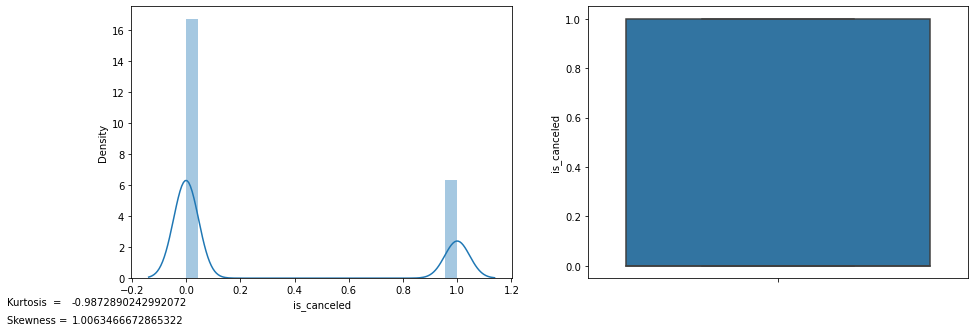

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


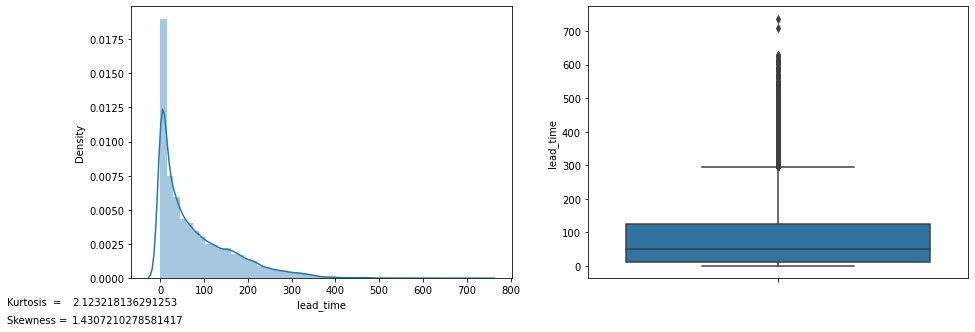

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


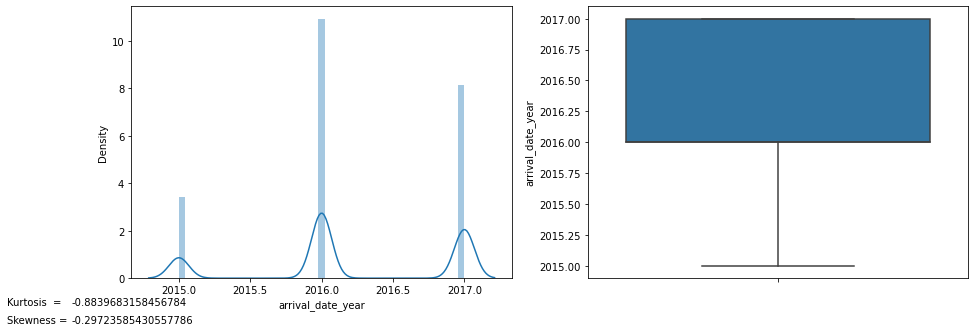

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


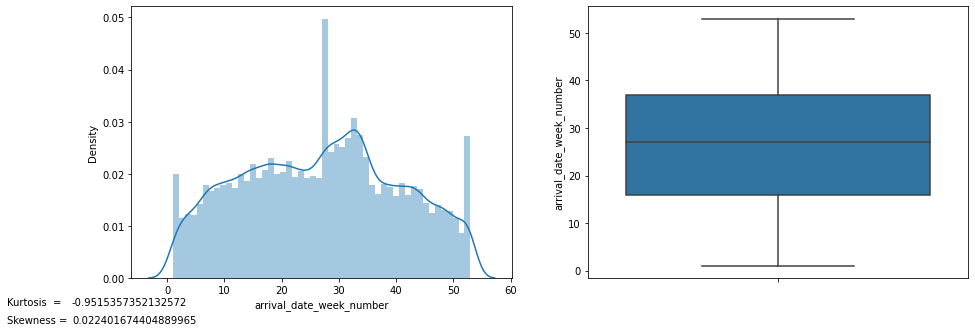

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


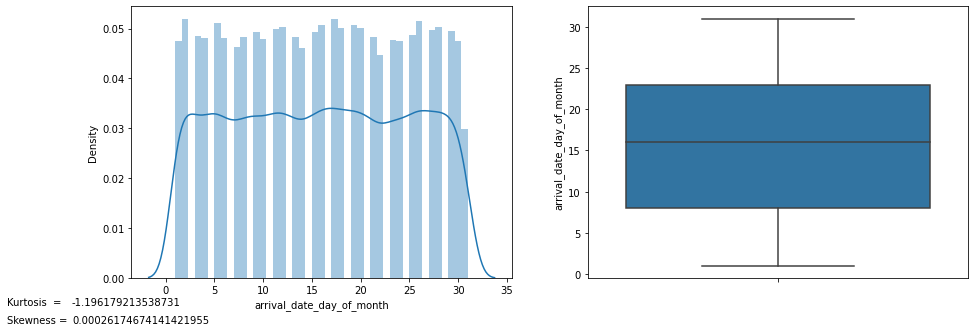

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


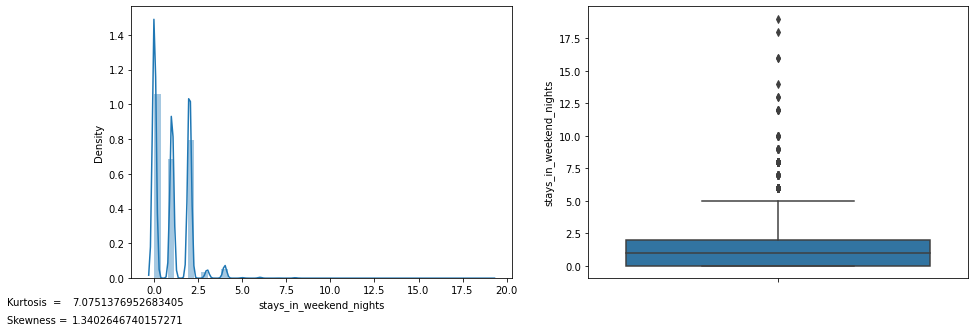

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


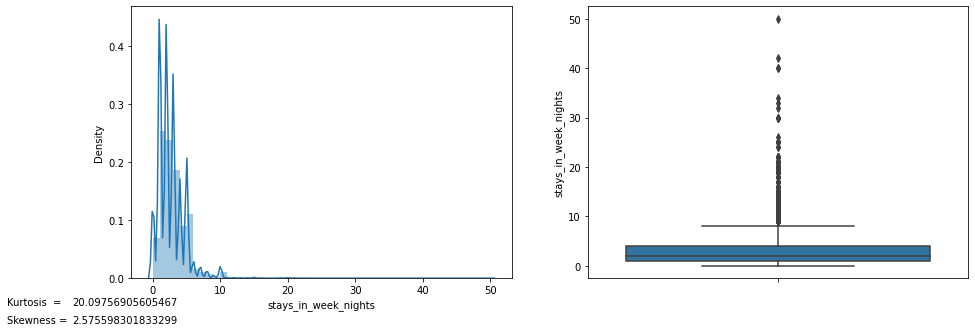

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


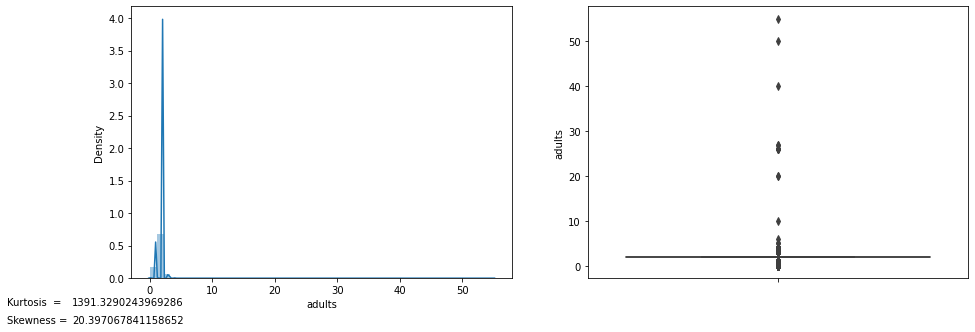

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


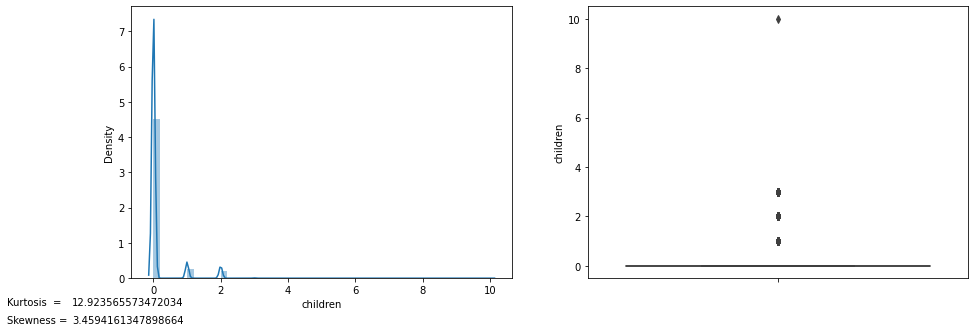

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


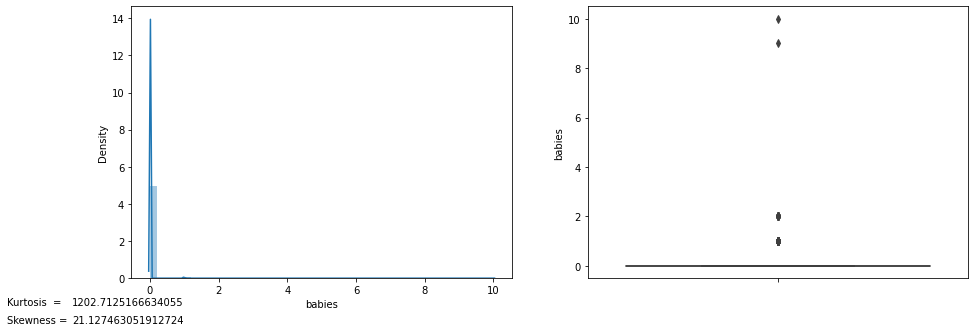

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


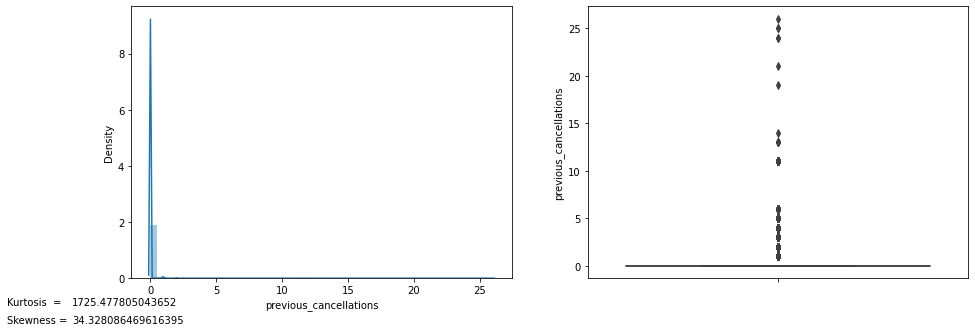

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


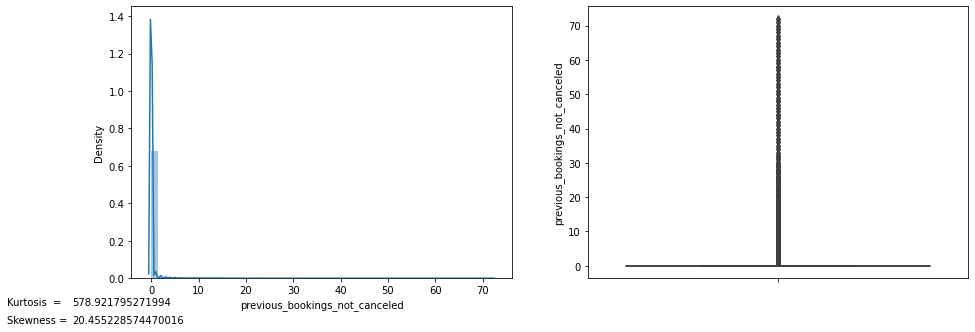

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


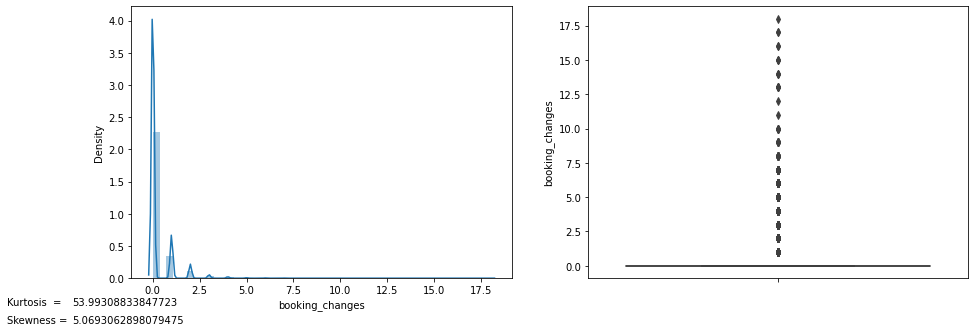

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


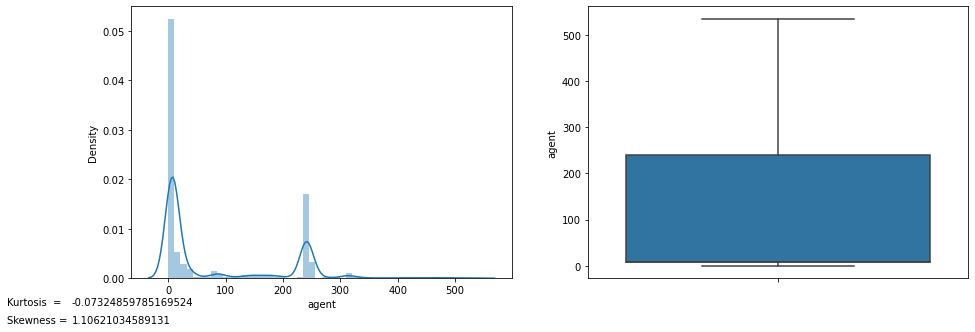

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


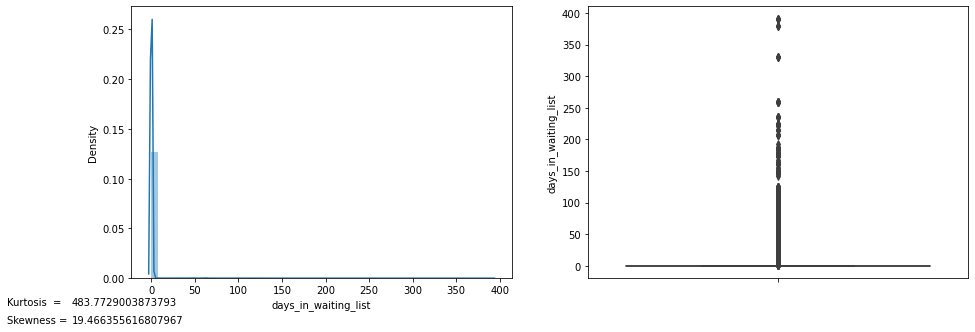

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


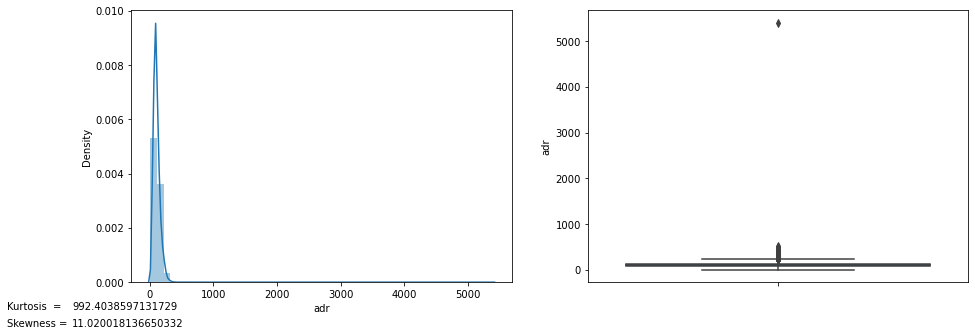

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


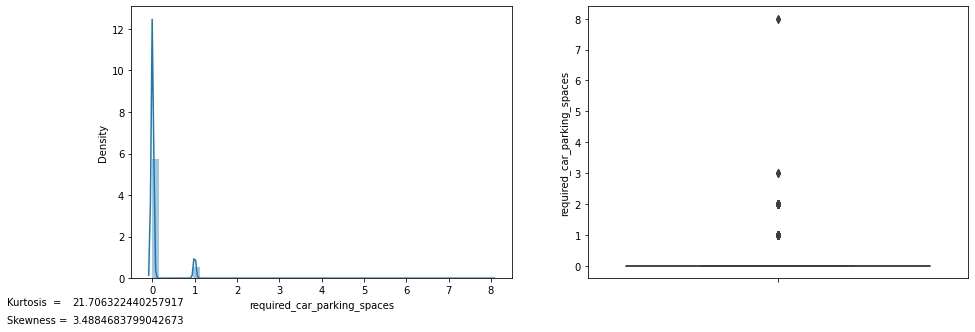

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


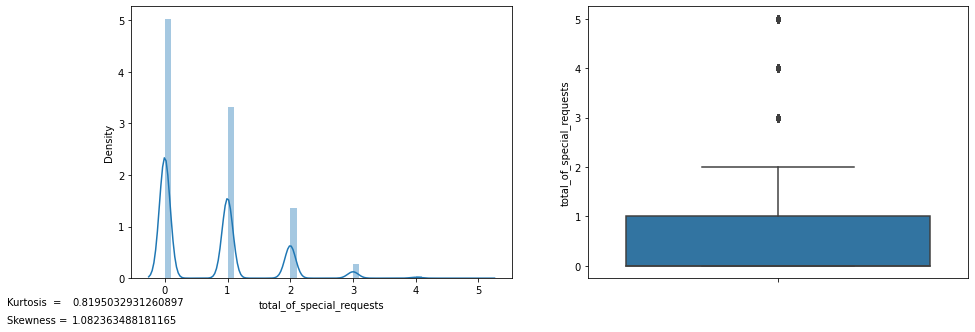

In [24]:
for i in data_num.columns:
    plt.subplots(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(data_num[i])
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data_num[i])
    plt.figtext(0.01,0.001, 'Skewness = ')
    plt.figtext(0.07,0.001, data_num[i].skew())
    plt.figtext(0.01,0.05, 'Kurtosis  =')
    plt.figtext(0.07,0.05, data_num[i].kurt())
    plt.show()

Lead time is right skewed. Minimum value of lead time is 0 and the median is around 50.

In [25]:
data_cat = data.select_dtypes(object)
data_cat.head()

hotel arrival_date_month meal country market_segment  \
0  Resort Hotel               July   BB     PRT         Direct   
1  Resort Hotel               July   BB     PRT         Direct   
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel is_repeated_guest reserved_room_type  \
0               Direct                 0                  C   
1               Direct                 0                  C   
2               Direct                 0                  A   
3            Corporate                 0                  A   
4                TA/TO                 0                  A   

  assigned_room_type deposit_type customer_type reservation_status  
0                  C   No Deposit     Transient          Check-Out  
1                  C   No Deposit     Transient          Check-Out  
2                  C   No Deposit     Transient          Check-Out  
3                  A   No Deposit     Transient          Check-Out  
4                  A   No Deposit     Transient          Check-Out

hotel


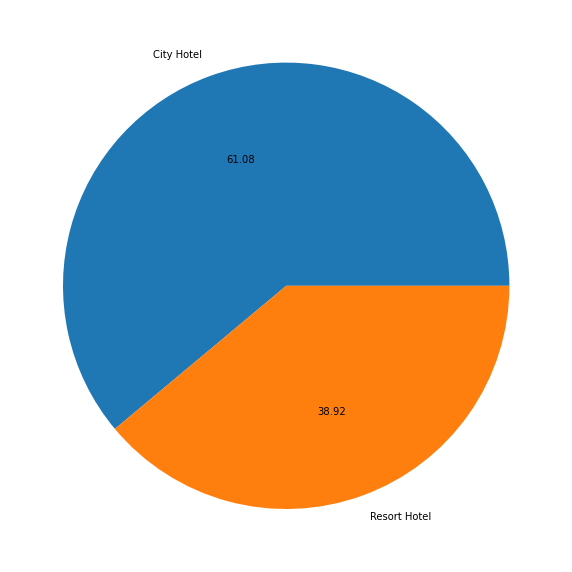

arrival_date_month


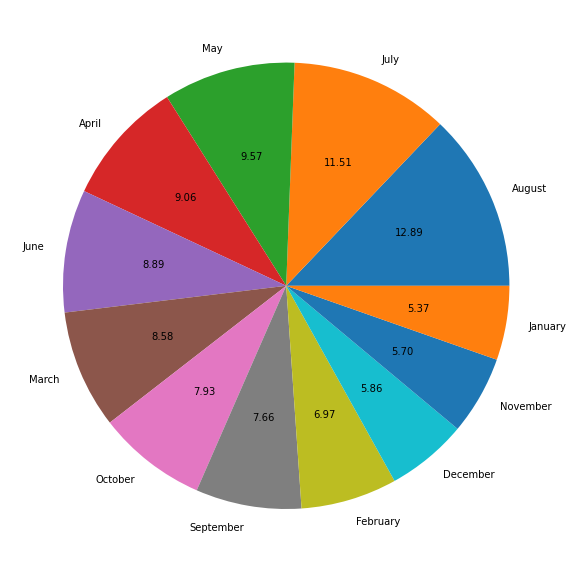

meal


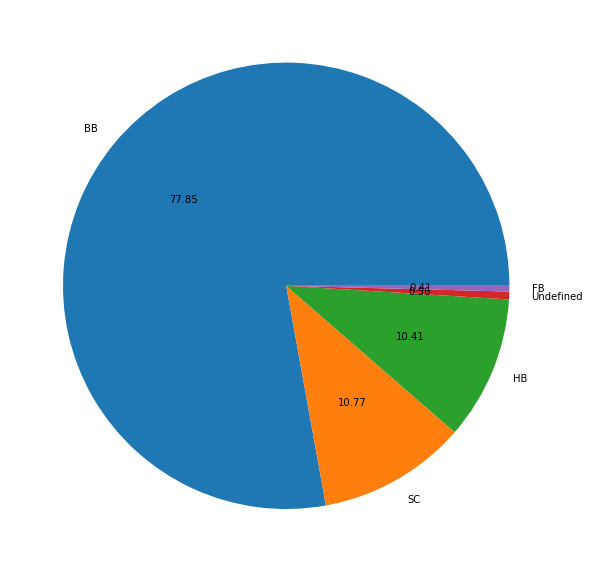

market_segment


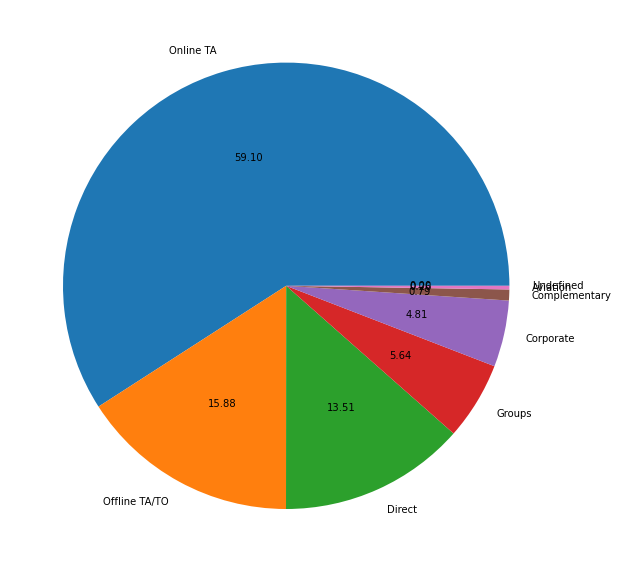

distribution_channel


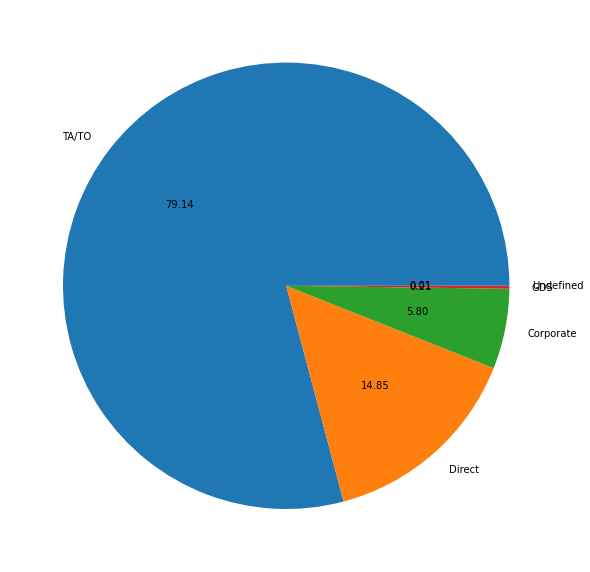

is_repeated_guest


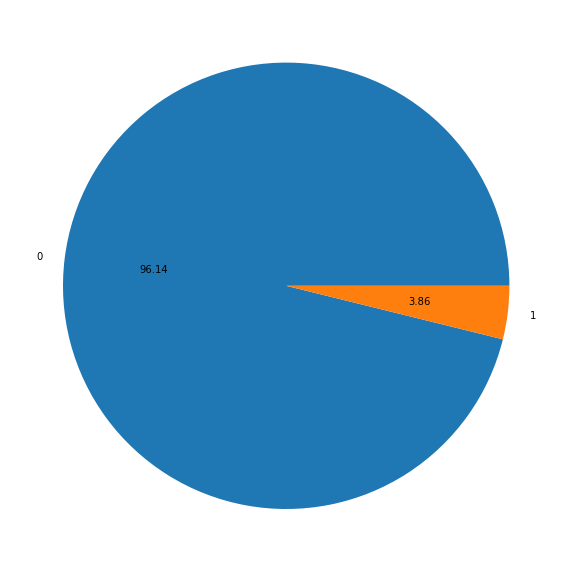

deposit_type


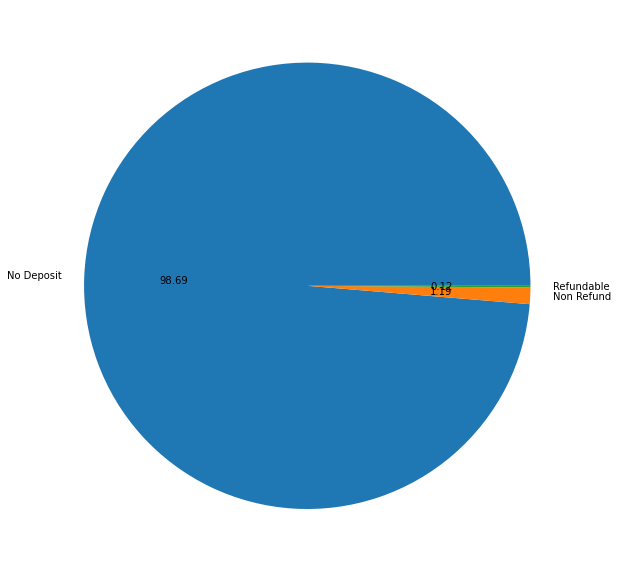

customer_type


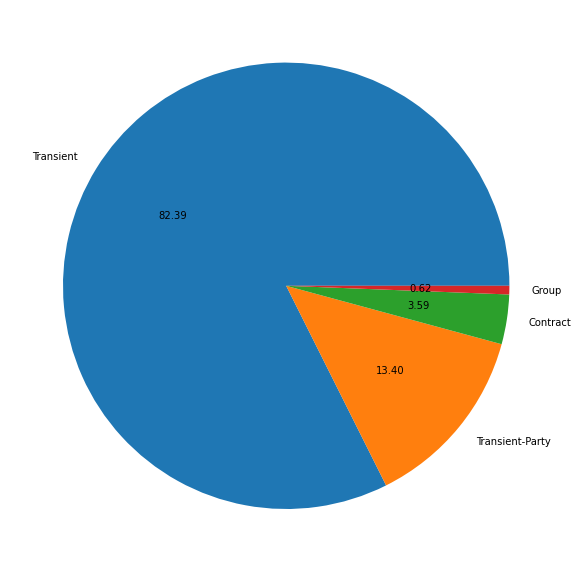

reservation_status


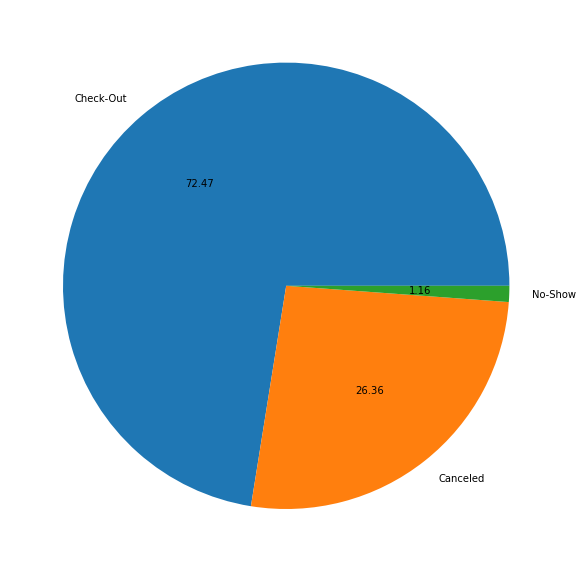

In [26]:
for i in ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 
          'is_repeated_guest', 'deposit_type','customer_type', 'reservation_status']:
    print(i)
    plt.figure(figsize=(10,12))
    z=data_cat[i].value_counts()/len(data_cat)*100
    plt.pie(z,autopct="%.2f",labels=z.index)
    plt.show()

1. 61% of the total bookings are done in City Hotel and the rest in Resort Hotel.

2. August has the highest number of bookings. Summer months from June to August contribute to 50% bookings.

3. 78% of the bookings made prefer a Bed and Breakfast stay.

4. 59% bookings are belong to Online Travel Agent market segment. 75% of the bookings belong to Travel Agent or Tour Operator.

5. 79% bookings are made through Travel Agents or Tour Operators. 15% bookings are done drirectly. 

6. 96% of the bookings made was not from a repeated guest.

7. 98.5% bookings are No Deposit bookings.

8. 82% of bookings come from Transient customers.

9. 72.5% bookings have been checked out, 1.16% bookings are a no show and 26% bookings ahve been cancelled.



Reserved Room Type


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


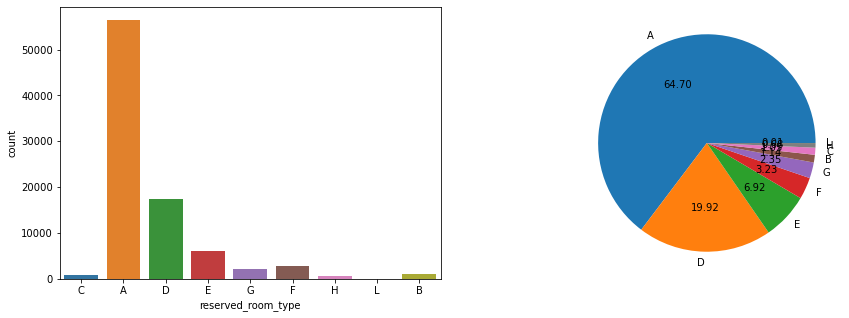

In [27]:
print('Reserved Room Type')
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data_cat['reserved_room_type'])

z=data_cat['reserved_room_type'].value_counts()/len(data_cat)*100
plt.subplot(1, 2, 2)
plt.pie(z,autopct="%.2f",labels=z.index)
plt.show()

64% Bookings are done for room category A and 20% bookings are done for room category D.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


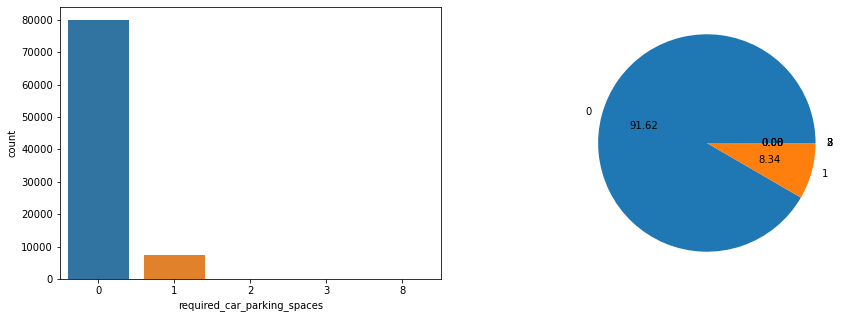

In [28]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data_num['required_car_parking_spaces'])

z=data_num['required_car_parking_spaces'].value_counts()/len(data_num)*100
plt.subplot(1, 2, 2)
plt.pie(z,autopct="%.2f",labels=z.index)
plt.show()

92% bookings require 0 car parking space

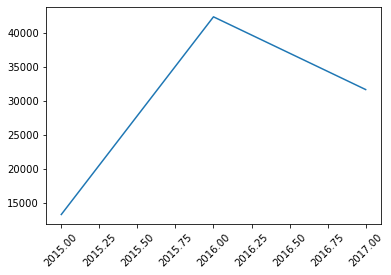

In [29]:
sns.lineplot(x=data['arrival_date_year'].value_counts().index, y=data['arrival_date_year'].value_counts().values)
plt.xticks(rotation=45)
plt.show()

Maximum bookings were made in the year 2016.

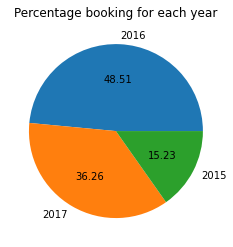

In [30]:
#plt.figure(figsize=(1,12))
z=data_num['arrival_date_year'].value_counts()/len(data_num)*100
plt.pie(z,autopct="%.2f",labels=z.index)
plt.title('Percentage booking for each year')
plt.show()

48.5% Bookings are mde in the year 2016.

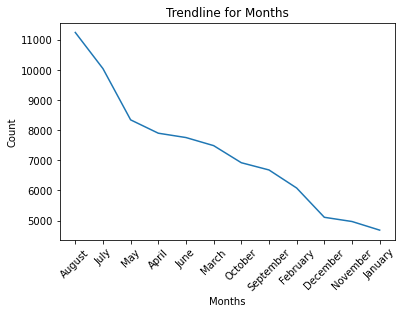

In [31]:
sns.lineplot(x=data['arrival_date_month'].value_counts().index, y=data['arrival_date_month'].value_counts().values)
plt.xticks(rotation=45)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Trendline for Months')
plt.show()

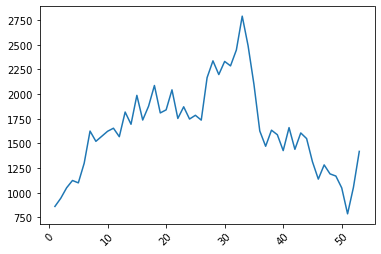

In [32]:
sns.lineplot(x=data['arrival_date_week_number'].value_counts().index, y=data['arrival_date_week_number'].value_counts().values)
plt.xticks(rotation=45)
plt.show()

Week 28 to 35 has the highest number of bookings.

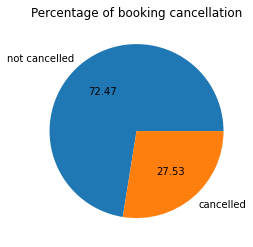

In [33]:
z = target.value_counts()
plt.pie(z, labels=['not cancelled', 'cancelled'], autopct="%.2f")
plt.title('Percentage of booking cancellation')
plt.show()

In [34]:
data.skew()

is_canceled                        1.006347
lead_time                          1.430721
arrival_date_year                 -0.297236
arrival_date_week_number           0.022402
arrival_date_day_of_month          0.000262
stays_in_weekend_nights            1.340265
stays_in_week_nights               2.575598
adults                            20.397068
children                           3.459416
babies                            21.127463
is_repeated_guest                  4.793398
previous_cancellations            34.328086
previous_bookings_not_canceled    20.455229
booking_changes                    5.069306
agent                              1.106210
days_in_waiting_list              19.466356
adr                               11.020018
required_car_parking_spaces        3.488468
total_of_special_requests          1.082363
dtype: float64

In [35]:
data.kurt()

is_canceled                         -0.987289
lead_time                            2.123218
arrival_date_year                   -0.883968
arrival_date_week_number            -0.951536
arrival_date_day_of_month           -1.196179
stays_in_weekend_nights              7.075138
stays_in_week_nights                20.097569
adults                            1391.329024
children                            12.923566
babies                            1202.712517
is_repeated_guest                   20.977146
previous_cancellations            1725.477805
previous_bookings_not_canceled     578.921795
booking_changes                     53.993088
agent                               -0.073249
days_in_waiting_list               483.772900
adr                                992.403860
required_car_parking_spaces         21.706322
total_of_special_requests            0.819503
dtype: float64

72.5% Bookings have not been cancelled.

# Bivariate

In [36]:
def month_map(x):
    if x=='January':
        x=1
    elif x=='February':
        x=2
    elif x=='March':
        x=3
    elif x=='April':
        x=4
    elif x=='May':
        x=5
    elif x=='June':
        x=6
    elif x=='July':
        x=7
    elif x=='August':
        x=8
    elif x=='September':
        x=9
    elif x=='October':
        x=10
    elif x=='November':
        x=11
    elif x=='December':
        x=12
    return x
data['arrival_date_month_number'] = data['arrival_date_month'].apply(lambda x : month_map(x))

In [37]:
cancelled = data[data['is_canceled']==1]
not_cancelled = data[data['is_canceled']==0]

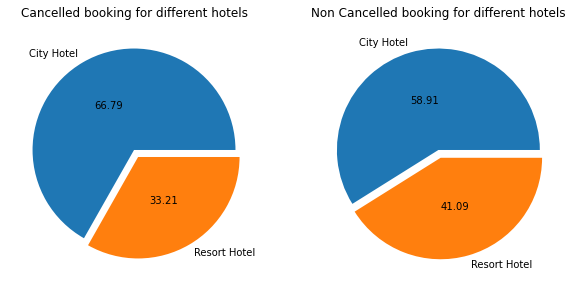

In [38]:
plt.figure(figsize=(10,15))
x=cancelled['hotel'].value_counts()/len(cancelled)*100
myexplode = [0, 0.08]
plt.subplot(1,2,1)
plt.pie(x,autopct="%.2f",labels=['City Hotel','Resort Hotel'],pctdistance=0.5,explode=myexplode)
plt.title("Cancelled booking for different hotels")
y=not_cancelled['hotel'].value_counts()/len(not_cancelled)*100
plt.subplot(1,2,2)
plt.pie(y,autopct="%.2f",labels=['City Hotel','Resort Hotel'],pctdistance=0.5,explode=myexplode)
plt.title("Non Cancelled booking for different hotels")
plt.show()

Out of the total bookings cancelled, City hotel has contributed towards 67% cancellations.

In [39]:
resort = data[data['hotel']=='Resort Hotel']
city = data[data['hotel']=='City Hotel']

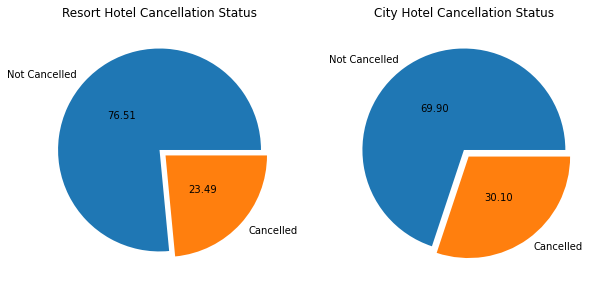

In [40]:
plt.figure(figsize=(10,15))
x=resort['is_canceled'].value_counts()/len(resort)*100
myexplode = [0, 0.08]
plt.subplot(1,2,1)
plt.pie(x,autopct="%.2f",labels=['Not Cancelled','Cancelled'],pctdistance=0.5,explode=myexplode)
plt.title("Resort Hotel Cancellation Status")
y=city['is_canceled'].value_counts()/len(city)*100
plt.subplot(1,2,2)
plt.pie(y,autopct="%.2f",labels=['Not Cancelled','Cancelled'],pctdistance=0.5,explode=myexplode)
plt.title("City Hotel Cancellation Status")
plt.show()

1. 23.5% of the bookings made in Resort Hotel are cancelled.

2. 30% of the bookings made in City Hotel are cancelled.

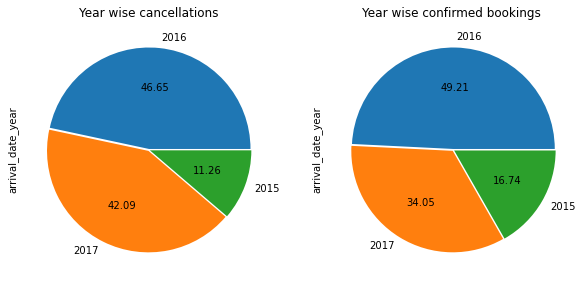

In [41]:
plt.figure(figsize=(10,12))
percentage_of_booking_each_year=cancelled['arrival_date_year'].value_counts()/len(cancelled)*100
plt.subplot(1,2,1)
percentage_of_booking_each_year.plot(kind='pie',autopct='%.2f',explode=[0.01,0.01,0.01])
plt.title("Year wise cancellations")

percentage_of_bookink_each_year=not_cancelled['arrival_date_year'].value_counts()/len(not_cancelled)*100
plt.subplot(1,2,2)
percentage_of_bookink_each_year.plot(kind='pie',autopct='%.2f',explode=[0.01,0.01,0.01])
plt.title("Year wise confirmed bookings ")
plt.show()

Out of the total cancellations made for the 3 years, 46.5% cancellations are made in 2016.

In [42]:
pd.crosstab(data['deposit_type'], data['is_canceled'])

is_canceled       0      1
deposit_type              
No Deposit    63077  23000
Non Refund       55    983
Refundable       81     26

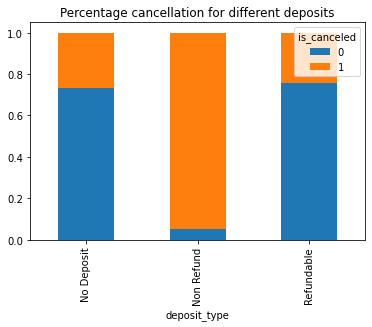

In [43]:
pd.crosstab(data['deposit_type'], data['is_canceled'], normalize='index').plot.bar(stacked=True)
plt.title('Percentage cancellation for different deposits')
plt.show()

Maximum ratio of cancellations occur for non refund bookings. Whereas the cancellation ratio for no deposit and refundable is almost the same.

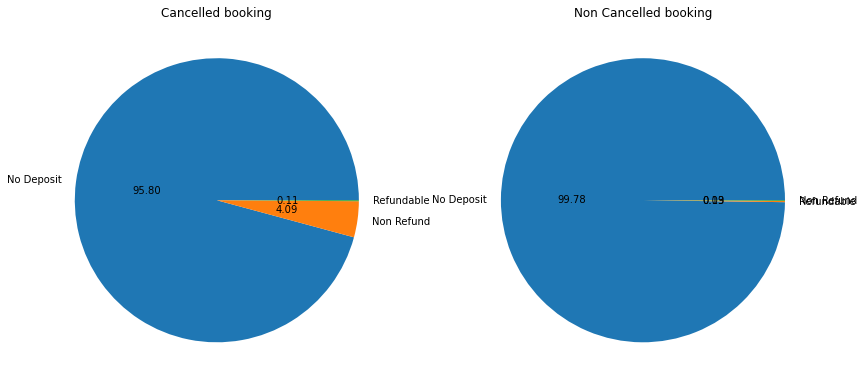

In [44]:
plt.figure(figsize=(14,15))
x=cancelled['deposit_type'].value_counts()/len(cancelled)*100

plt.subplot(1,2,1)
plt.pie(x,autopct="%.2f",labels=['No Deposit','Non Refund', 'Refundable'],pctdistance=0.5)
plt.title("Cancelled booking")
y=not_cancelled['deposit_type'].value_counts()/len(not_cancelled)*100
plt.subplot(1,2,2)
plt.pie(y,autopct="%.2f",labels=['No Deposit','Refundable','Non Refund'],pctdistance=0.5)
plt.title("Non Cancelled booking")
plt.show()

Out of the bookings cancelled, 96% cancellations occured for no deposit bookings.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


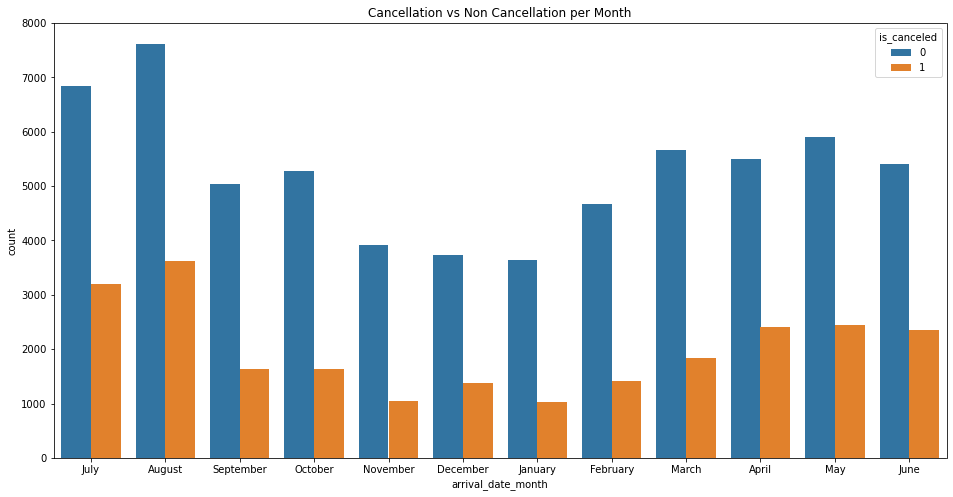

In [45]:
plt.figure(figsize=(16,8))
sns.countplot(data['arrival_date_month'], hue=data['is_canceled'])
plt.title('Cancellation vs Non Cancellation per Month')
plt.show()

Maximum cancellations occured for the month of August followed by July. Also the number of confirmed bookings are highest for August followed by July.

In [46]:
import plotly.express as px

In [47]:
country = data.groupby(['country'])['adults', 'children', 'babies'].sum()
country['total_guests'] = country['adults']+country['children']+country['babies']
country

<ipython-input-47-1f4f6edee582>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  country = data.groupby(['country'])['adults', 'children', 'babies'].sum()


adults  children  babies  total_guests
country                                        
ABW           5       0.0       0           5.0
AGO         546      77.0       5         628.0
AIA           2       2.0       0           4.0
ALB          20       0.0       1          21.0
AND          15       4.0       0          19.0
...         ...       ...     ...           ...
VGB           2       0.0       0           2.0
VNM          17       0.0       0          17.0
ZAF         139      17.0       0         156.0
ZMB           4       2.0       0           6.0
ZWE           8       0.0       0           8.0

[178 rows x 4 columns]

In [48]:
fig = px.choropleth(country, locations=country.index,
                    color=country['total_guests'], 
                    hover_name=country.index)
fig.show()

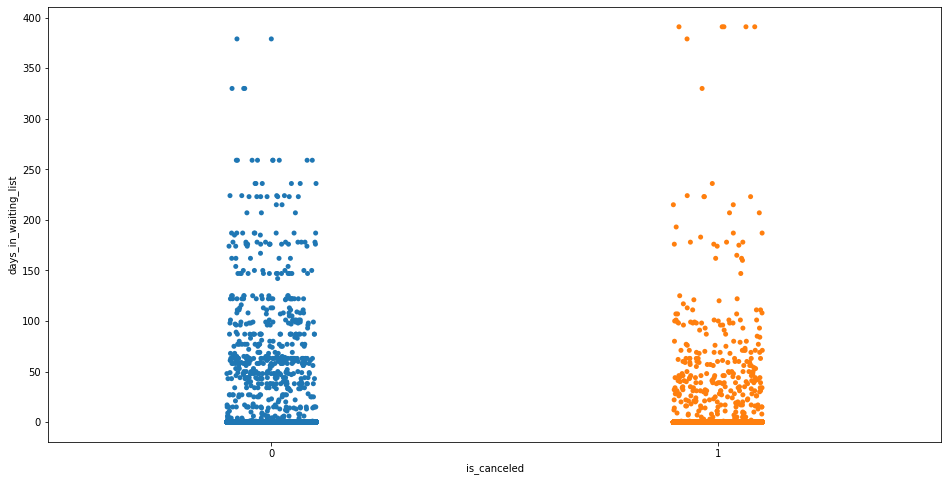

In [49]:
plt.figure(figsize=(16,8))
sns.stripplot(x='is_canceled', y='days_in_waiting_list', data=data)
plt.show()

We observe that there is no relation between days in waiting list and cancellations. 

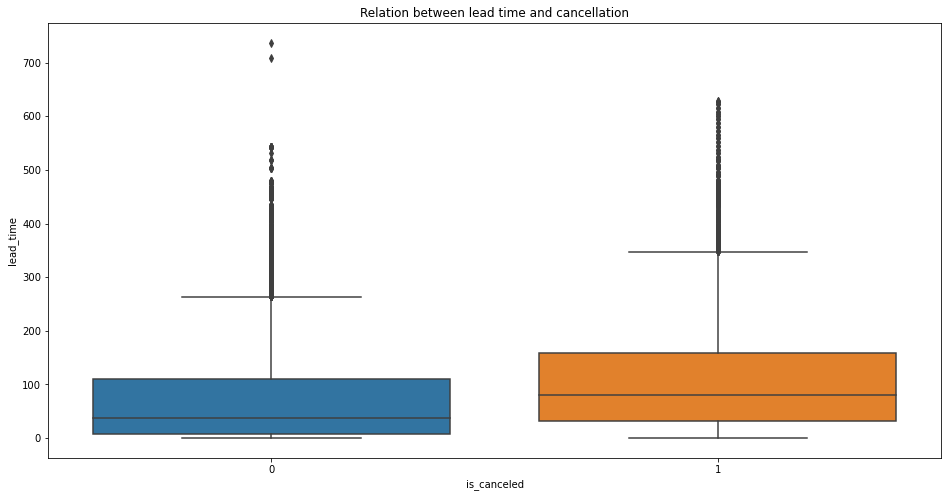

In [50]:
plt.figure(figsize=(16,8))
sns.boxplot(x='is_canceled', y='lead_time', data=data)
plt.title('Relation between lead time and cancellation')
plt.show()

We observe that lead time for cancelled bookings is greater than that of confirmed bookings. Hence we can say that people tend to make the bookings in advance and then tend to cancel them due to various reseaons.


In [51]:
pd.crosstab(data['customer_type'], data['is_canceled'], normalize='index')*100

is_canceled              0          1
customer_type                        
Contract         83.668262  16.331738
Group            90.203327   9.796673
Transient        69.855827  30.144173
Transient-Party  84.745038  15.254962

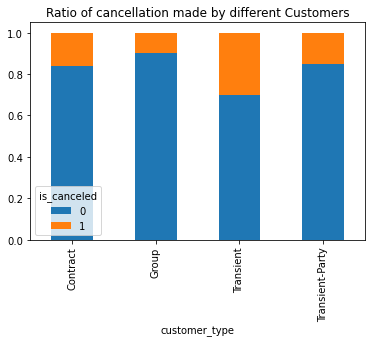

In [52]:
pd.crosstab(data['customer_type'], data['is_canceled'], normalize='index').plot.bar(stacked=True)
plt.title('Ratio of cancellation made by different Customers')
plt.show()

For different types of customers, the ratio of cancellation is highest for transient customers. The ratio of cancellation for group bookings is the lowest.

In [53]:
pd.crosstab(data['customer_type'], data['is_canceled'])

is_canceled          0      1
customer_type                
Contract          2623    512
Group              488     53
Transient        50197  21661
Transient-Party   9905   1783

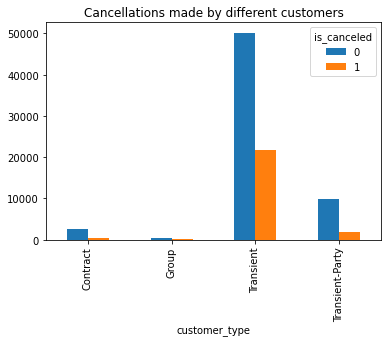

In [54]:
pd.crosstab(data['customer_type'], data['is_canceled']).plot.bar()
plt.title('Cancellations made by different customers')
plt.show()

Out of the total cancellations, maximum calcellations are made by transient customers. Maximum number of confirmed bookings also belong to transient customers.

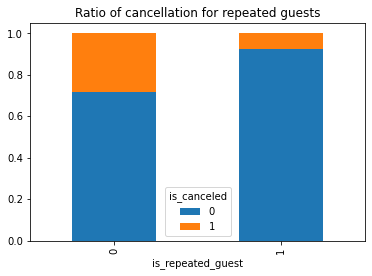

In [55]:
pd.crosstab(data['is_repeated_guest'], data['is_canceled'],normalize='index').plot.bar(stacked=True)
plt.title('Ratio of cancellation for repeated guests')
plt.show()

The ratio of cancellation is less for repeated guest compared to non repeated guests.

In [56]:
pd.crosstab(data['market_segment'], data['is_canceled'])

is_canceled         0      1
market_segment              
Aviation          181     45
Complementary     607     85
Corporate        3687    509
Direct          10043   1737
Groups           3589   1332
Offline TA/TO   11798   2057
Online TA       33308  18242
Undefined           0      2

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



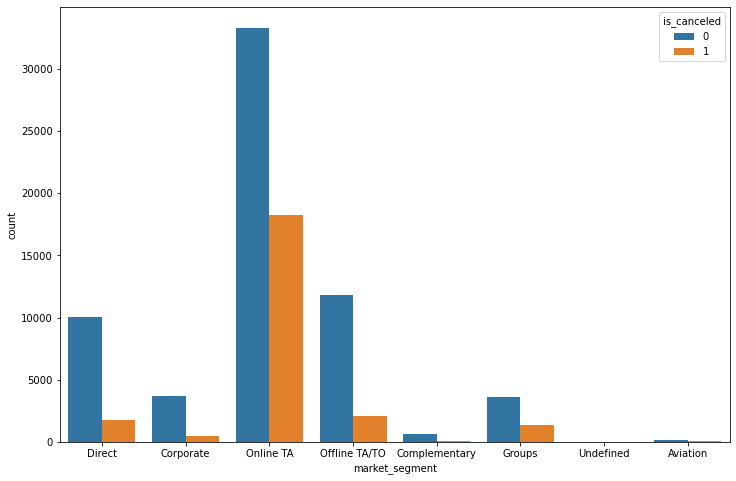

In [57]:
plt.figure(figsize=(12,8))
sns.countplot(data['market_segment'], hue=data['is_canceled'])
plt.show()

Maximum cancellations are made by Online TA customers, followed by Offline TA/TO.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



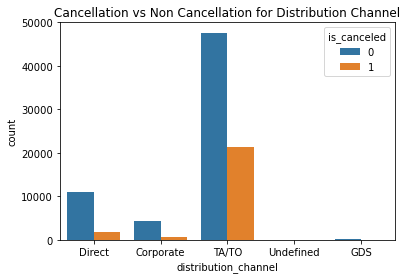

In [58]:
sns.countplot(data['distribution_channel'], hue=data['is_canceled'])
plt.title('Cancellation vs Non Cancellation for Distribution Channel')
plt.show()

Maximum cancellations occur for customers making booking through Travel Agents/Tour Operators.

In [59]:
pd.crosstab(data['customer_type'], data['reserved_room_type'])

reserved_room_type      A    B    C      D     E     F     G    H  L
customer_type                                                       
Contract             2005   55   10    794   172    97     1    1  0
Group                 341    6    5    134    31    10    12    2  0
Transient           44874  566  819  15243  5243  2612  1926  569  6
Transient-Party      9209  369   80   1205   589   101   111   24  0

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



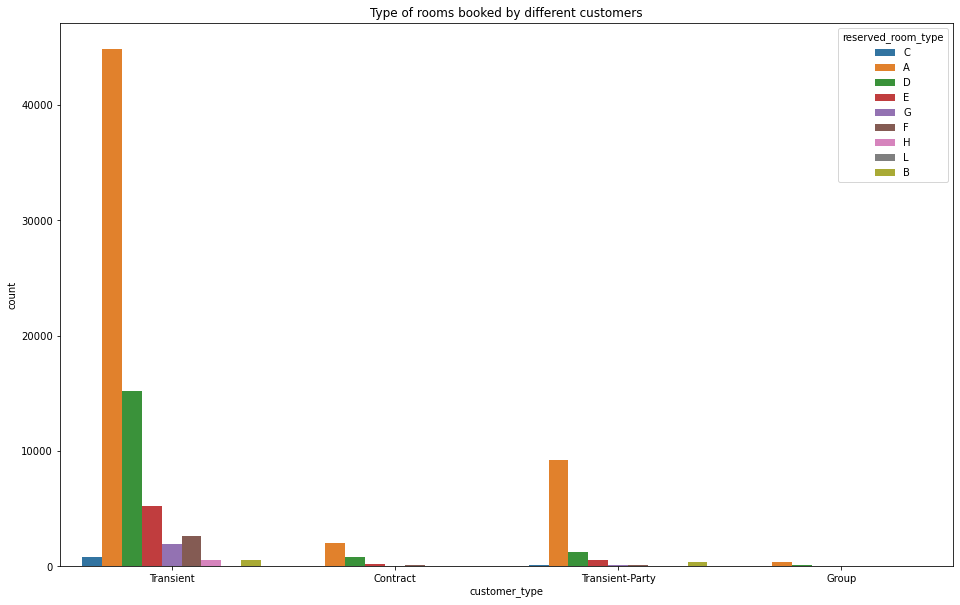

In [60]:
plt.figure(figsize=(16,10))
sns.countplot(data['customer_type'], hue=data['reserved_room_type'])
plt.title('Type of rooms booked by different customers')
plt.show()

All the customer type prefer booking room type A followed by room type D.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



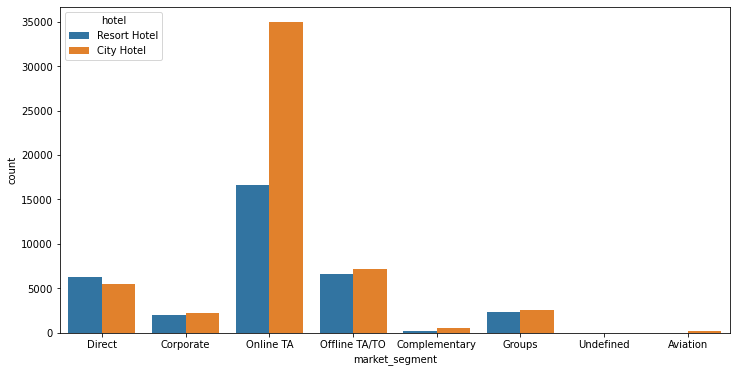

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(data['market_segment'], hue=data['hotel'])
plt.show()

1. For City Hotel, maximum bookings are from Online TA market segment.

2. For Resort Hotel, maximum bookings are from Online TA market segment.

3. The ratio of bookings from Direct, Corporate, Offline TA/TO and groups for Resort and City Hotel is almost same.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



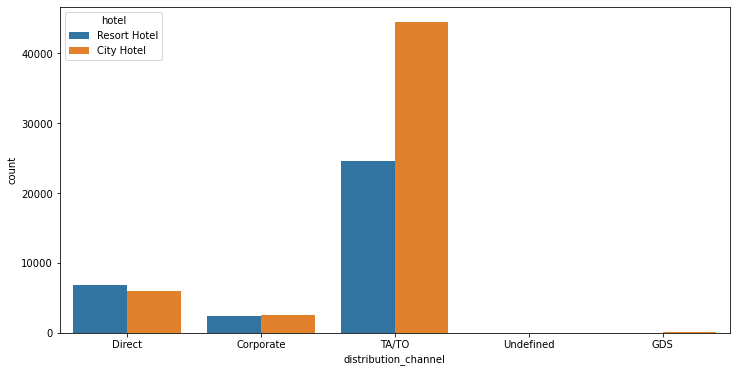

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(data['distribution_channel'], hue=data['hotel'])
plt.show()

1. For City Hotel, maximum bookings are made through TA/TO.

2. For Resort Hotel, maximum bookings are made through TA/TO.

3. The ratio of bookings for City and Resort Hotel is almost same for Direct and Corporate.

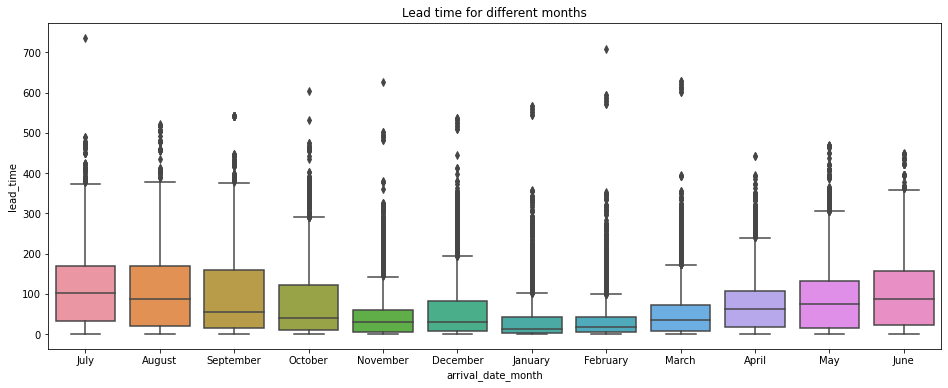

In [63]:
plt.figure(figsize=(16,6))
sns.boxplot(x=data['arrival_date_month'], y=data['lead_time'])
plt.title('Lead time for different months')
plt.show()

Lead time is higher for May, June, July and August. These months also have higher number of bookings compared to the other months. Hence for months having higher bookings, lead time is also more.

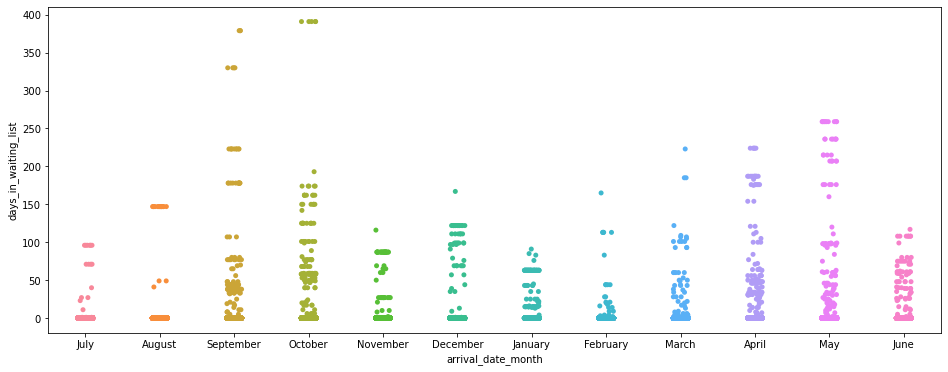

In [64]:
plt.figure(figsize=(16,6))
sns.stripplot(x=data['arrival_date_month'], y=data['days_in_waiting_list'])
plt.show()

April and May have more days in waiting list. A customer has to wait more number of days for the booking to be confirmed in thr month of April and May.

In [65]:
len(data[(data['previous_cancellations']>0) & (data['is_canceled']==1)])/len(cancelled)*100

4.76071473197551

4.76% of cancelled bookings are made by customers who have previously cancelled their bookings.

# Multivariate

In [66]:
cancelled = data[data['is_canceled']==1]
not_cancelled = data[data['is_canceled']==0]

In [67]:
not_cancelled['total_guests'] = not_cancelled['adults']+not_cancelled['children']+not_cancelled['babies']

<ipython-input-67-2b39565d9b2d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



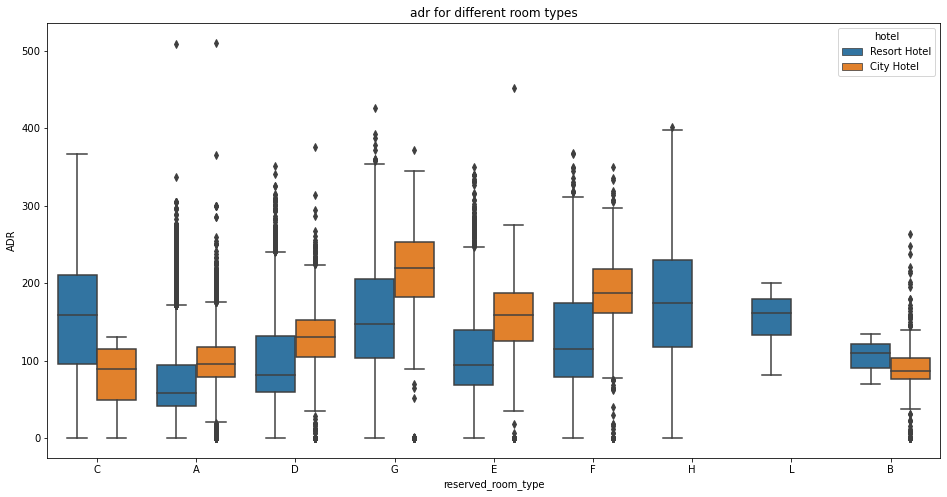

In [68]:
plt.figure(figsize=(16,8))
sns.boxplot(data=not_cancelled, x='reserved_room_type', y=not_cancelled['adr'], hue='hotel')
plt.ylabel('ADR')
plt.title('adr for different room types')
plt.show()

1. For City Hotel, ADR for type G room is the highest.

2. City Hotel does not have reservation for type H and L.

3. For City Hotel ADR of room A,B and C is similar.

4. For Resort Hotel, ADR for room C and H is highest. 

5. Except for room type C and B, the ADR for City hotel is greater than ADR of Resort hotel.

6. No reservation is done for room I and K in City and Resort hotel.

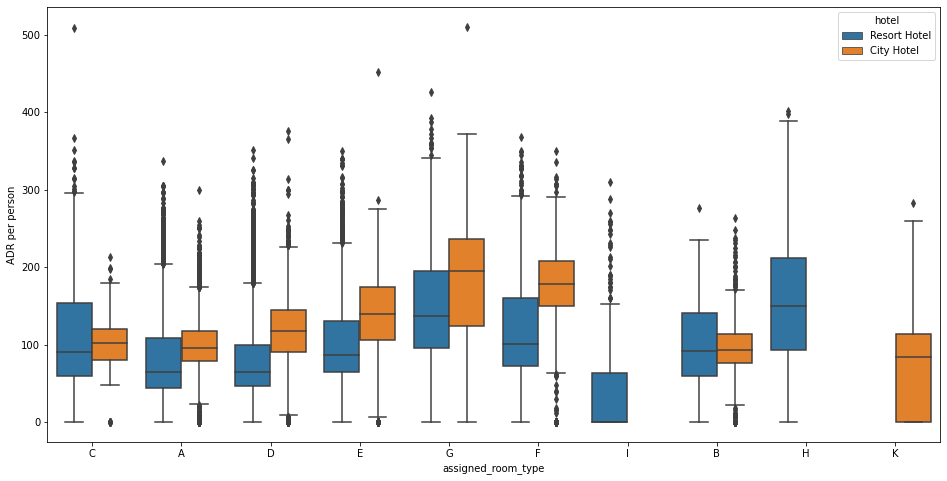

In [69]:
plt.figure(figsize=(16,8))
sns.boxplot(data=not_cancelled, x='assigned_room_type', y=not_cancelled['adr'], hue='hotel')
plt.ylabel('ADR per person')
plt.show()

1. For City Hotel, ADR for type G room is the highest.

2. No one stays in rooms I, H and L of City Hotel.

3. No one stays in room K and L of the Resort hotel.

4. For Resort Hotel, ADR for room G and H is highest. 

5. Except for room type C and B, the ADR for City hotel is greater than ADR of Resort hotel.

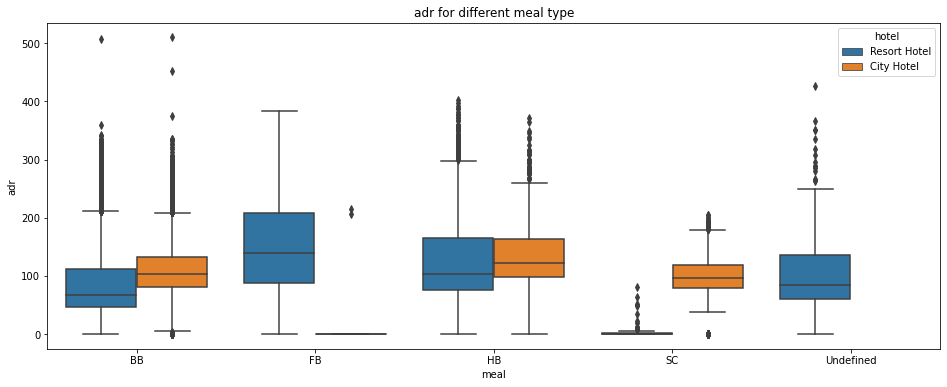

In [70]:
plt.figure(figsize=(16,6))
sns.boxplot(x=not_cancelled['meal'], y=not_cancelled['adr'], hue=not_cancelled['hotel'])
plt.title('adr for different meal type')
plt.show()

1. ADR for Full Board is highest. 

2. For resort hotel, ADR of Full board > Half Board > Bed and Breakfast 

3. For City hotel ADR of Half Board > Bed and Breakfast > SC(no meal package)

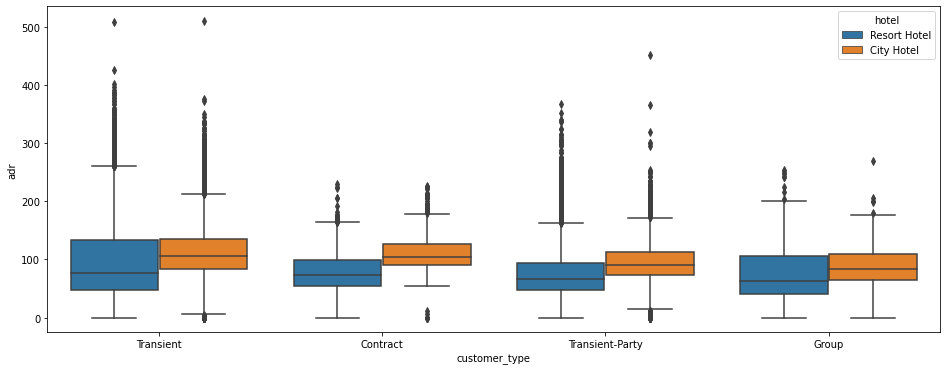

In [71]:
plt.figure(figsize=(16,6))
sns.boxplot(x=not_cancelled['customer_type'], y=not_cancelled['adr'], hue=not_cancelled['hotel'])
plt.show()

1. ADR of Transient customers of City hotel is highest.

2. ADR of all customers is more for City hotel than Reosrt hotel.

3. ADR for groups is the lowest. This is might due to the fact that the hotel ight be offering discounts for Group bookings.

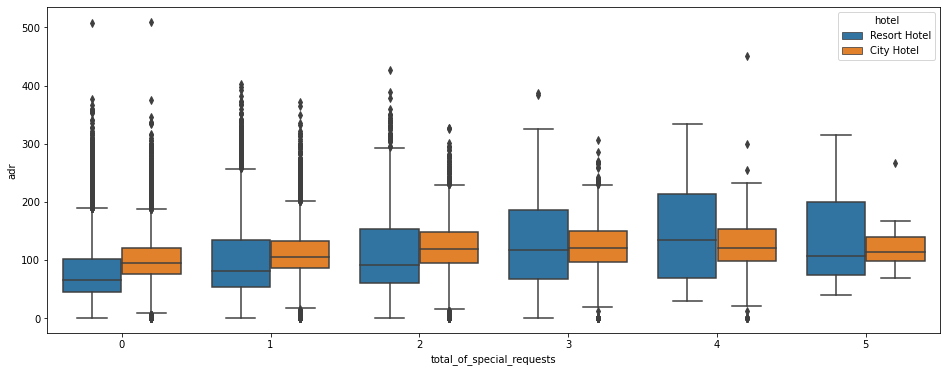

In [72]:
plt.figure(figsize=(16,6))
sns.boxplot(x=not_cancelled['total_of_special_requests'], y=not_cancelled['adr'], hue=not_cancelled['hotel'])
plt.show()

ADR increases for Resort and City hotel as the number of special request increases except for 5.

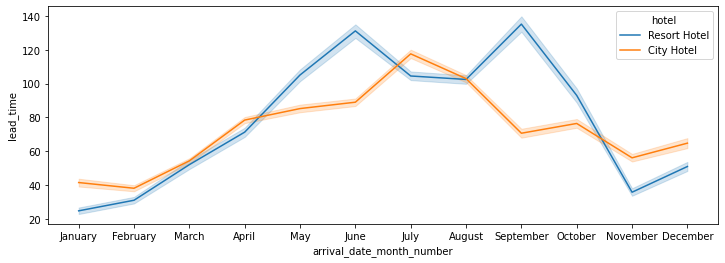

In [73]:
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ticks = np.arange(1,13)
plt.figure(figsize=(12,4))
sns.lineplot(data=data, x='arrival_date_month_number', y='lead_time', hue='hotel')
plt.xticks(ticks=ticks, labels=labels)
plt.show()

1. Lead time for resort hotel is highest in June and September.

2. Lead time for city hotel is highest in July and August.

3. Lead time for both the hotel starts increasing during summer months and decreasing during winter months.

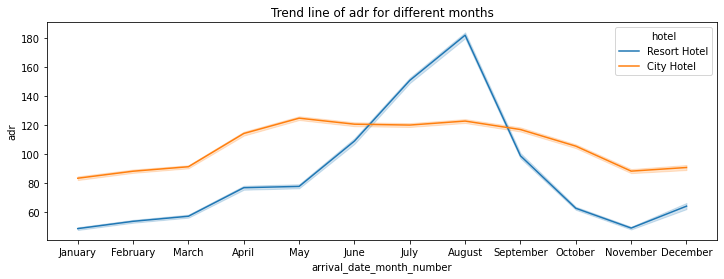

In [74]:
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ticks = np.arange(1,13)
plt.figure(figsize=(12,4))
sns.lineplot(data=not_cancelled, x='arrival_date_month_number', y='adr', hue='hotel')
plt.xticks(ticks=ticks, labels=labels)
plt.title('Trend line of adr for different months')
plt.show()

1. ADR of Resort hotel is highest in the months of July and August.

2. ADR of Resort hotel rises sharply during the summer months whereas ADR of City hotel rises at a lesser rate.

3. ADR of City hotel remains in the range of 80 to 120.

In [75]:
not_cancelled['weekday'] = not_cancelled['reservation_status_date'].dt.weekday

<ipython-input-75-f9eb784365fd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



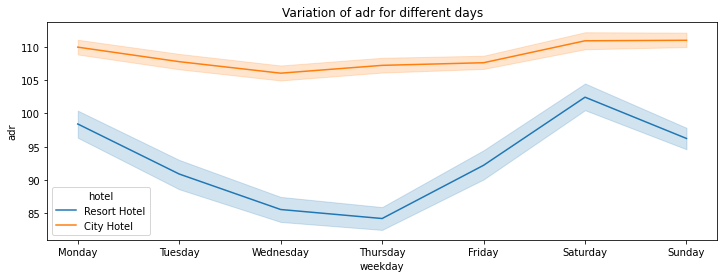

In [76]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ticks = np.arange(0,7)
plt.figure(figsize=(12,4))
sns.lineplot(data=not_cancelled, x='weekday', y='adr', hue='hotel')
plt.xticks(ticks=ticks, labels=labels)
plt.title('Variation of adr for different days')
plt.show()

1. ADR of City hotel almost remains constant for all the weekdays.

2. ADR of Resort hotel rises sharply on the weekends. 

3. ADR of Resort hotel is lower than that of City hotel for all the days.

In [77]:
not_cancelled = not_cancelled.drop('weekday', axis=1)

In [78]:
data = data.drop('arrival_date_month_number',axis=1)

In [79]:
data.shape

(87222, 31)

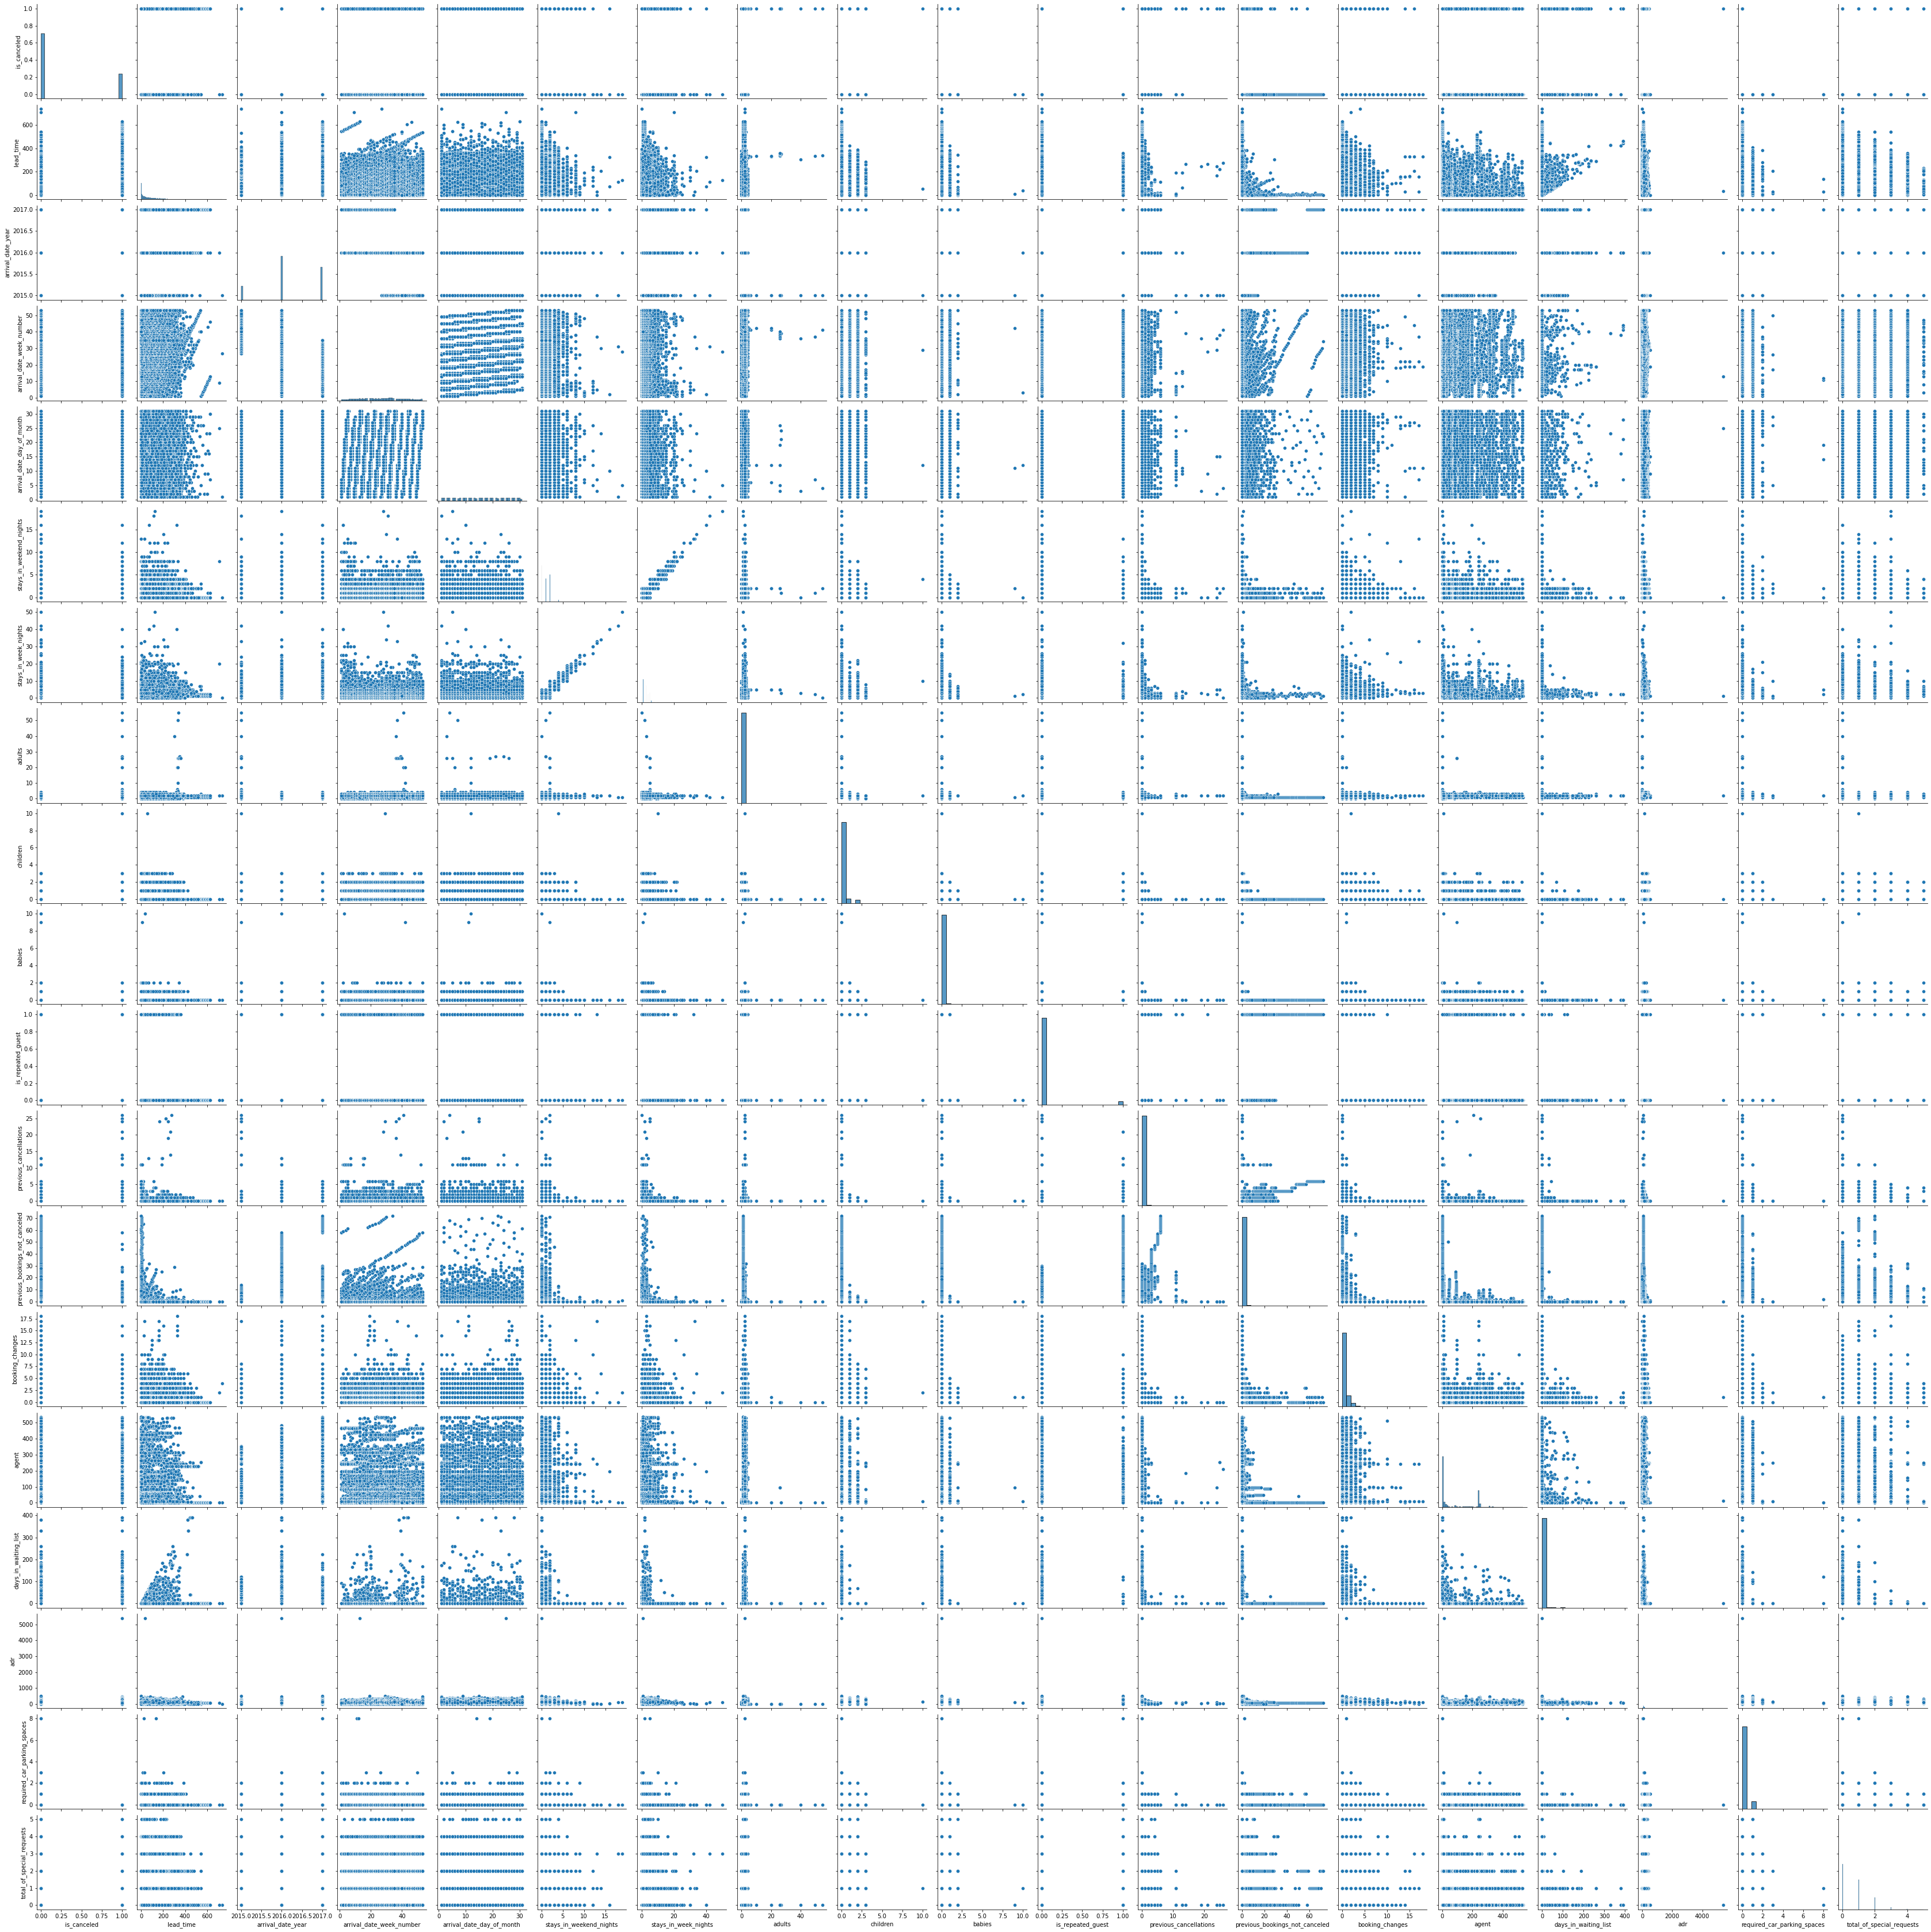

In [80]:
sns.pairplot(data)
plt.show()

# Correlation

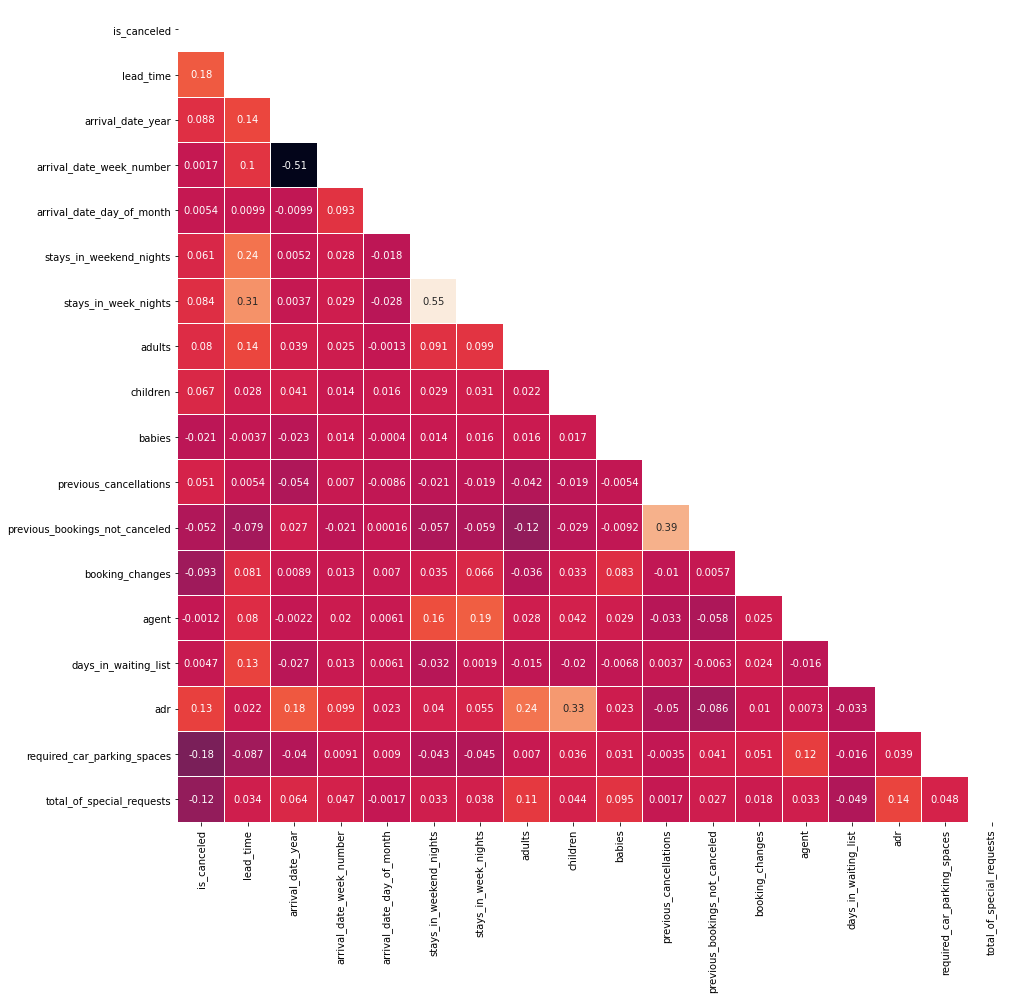

In [81]:
correlation= data.corr()
matrix = np.triu(correlation)

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, linecolor="white",linewidths=0.02,mask=matrix,cbar=False)
plt.show()

Pearson Correlation - It gives a measure of how much two numeric variables are linearly correlated. It tries to obtain a best fit line between two numeric variables and how close the points are to a fitted line. It assumes normal distribution of data.

D:\anaconda\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning:

overflow encountered in longlong_scalars



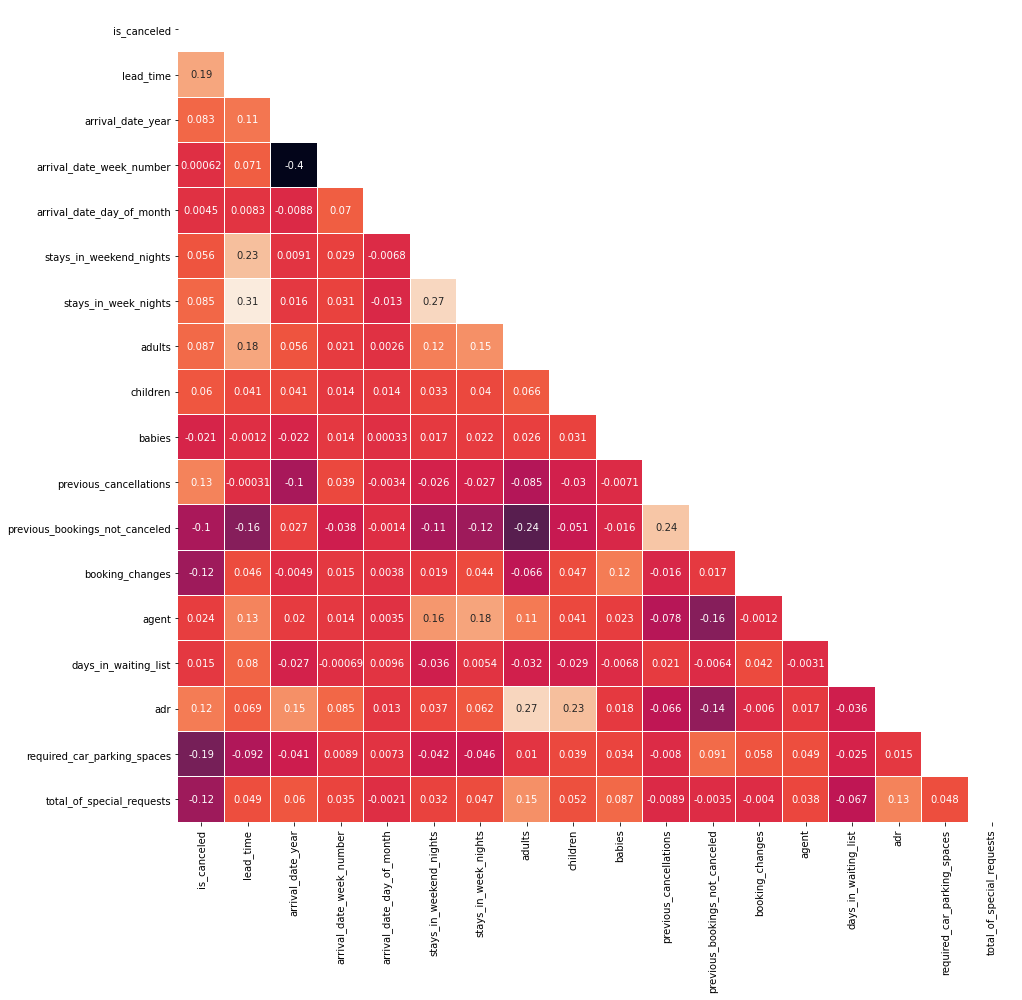

In [82]:
correlation= data.corr(method='kendall')
matrix = np.triu(correlation)

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, linecolor="white",linewidths=0.02,mask=matrix,cbar=False)
plt.show()

Kendall Correlation - It does not assume normal distribution of data and looks for a monotonic relationship between variables. Two variables are monotonic correlated if any greater value of the one variable will result in a greater value of the other variable. It is a bit slower than Spearman correlation.

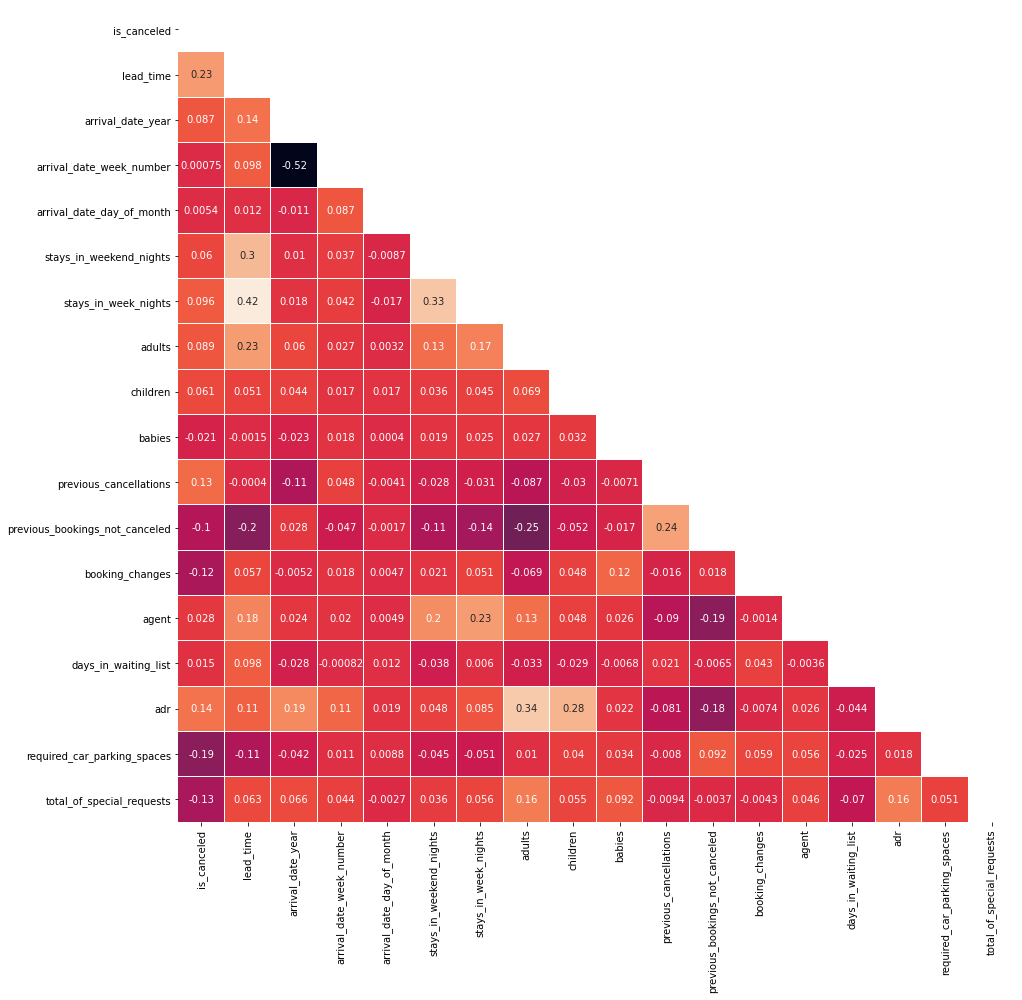

In [83]:
correlation= data.corr(method='spearman')
matrix = np.triu(correlation)

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, linecolor="white",linewidths=0.02,mask=matrix,cbar=False)
plt.show()

Spearman Correlation - Similar to Kendall correlation but is faster than Kendall.

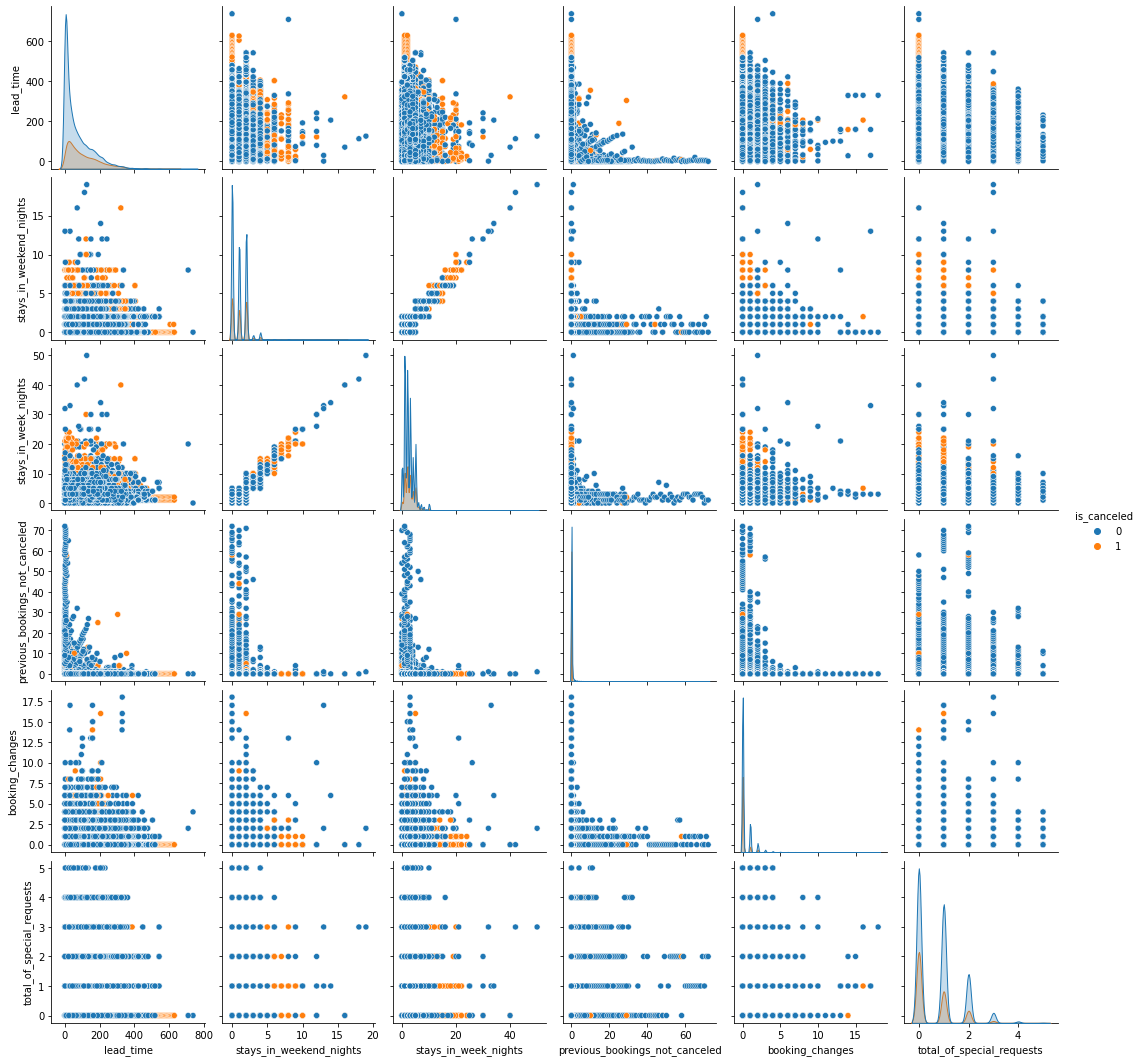

In [84]:
a=data[['lead_time','stays_in_weekend_nights','stays_in_week_nights','previous_bookings_not_canceled','booking_changes','total_of_special_requests','is_canceled']]
sns.pairplot(data=a,hue='is_canceled')
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



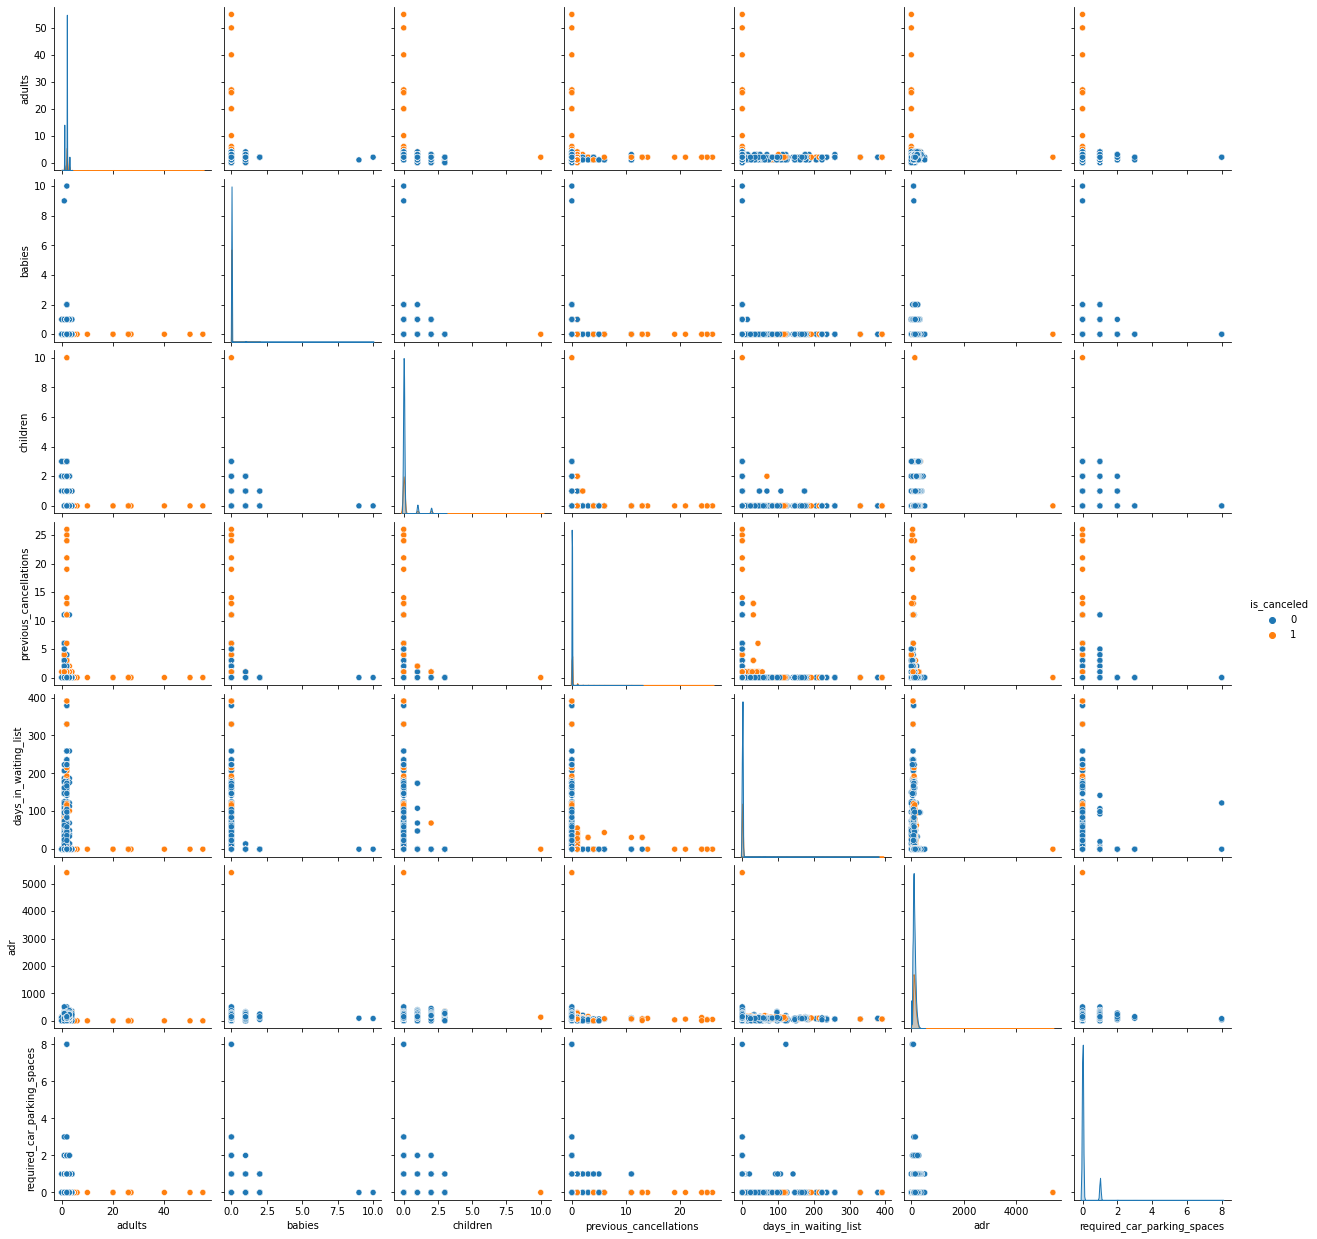

In [85]:
b=data[['adults','babies','children','previous_cancellations','days_in_waiting_list','adr','required_car_parking_spaces','is_canceled']]
sns.pairplot(data=b,hue='is_canceled')
plt.show()

In [86]:
3dd

SyntaxError: invalid syntax (<ipython-input-86-43fb3ee3164b>, line 1)

# Statistical Tests

In [89]:
from scipy import stats

In [87]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'reservation_status'],
      dtype='object')

In [90]:
p_values = []
for i in ['hotel', 'arrival_date_month', 'meal', 'country','market_segment', 'distribution_channel', 'is_repeated_guest',
          'reserved_room_type', 'assigned_room_type', 'deposit_type','customer_type', 'reservation_status', 
          'arrival_date_year', 'children', 'babies', 'required_car_parking_spaces', 'total_of_special_requests']:
    pval = stats.chi2_contingency(pd.crosstab(data['is_canceled'], data[i]))[1]
    p_values.append(pval)

Hypothesis of Chi-square test

H0 : Attributes are independent

H1 : Attributes are dependent

In [91]:
p_val_cat = pd.DataFrame({'Feature': ['hotel', 'arrival_date_month', 'meal', 'country','market_segment', 
                                      'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 
                                      'assigned_room_type', 'deposit_type','customer_type', 'reservation_status', 
                                      'arrival_date_year', 'children', 'babies', 'required_car_parking_spaces', 
                                      'total_of_special_requests'],
                         'p_values' : p_values})
p_val_cat

Feature       p_values
0                         hotel  8.857785e-101
1            arrival_date_month  1.768868e-129
2                          meal   3.587835e-77
3                       country   0.000000e+00
4                market_segment   0.000000e+00
5          distribution_channel   0.000000e+00
6             is_repeated_guest  3.274953e-151
7            reserved_room_type   1.274860e-55
8            assigned_room_type  2.229083e-151
9                  deposit_type   0.000000e+00
10                customer_type  1.043303e-305
11           reservation_status   0.000000e+00
12            arrival_date_year  1.100948e-147
13                     children   1.199576e-92
14                       babies   3.965215e-08
15  required_car_parking_spaces   0.000000e+00
16    total_of_special_requests   0.000000e+00

Since the p_values is less than 0.05, we reject the null hypothesis. Hence all the features are significant.

Hypothesis for Shapiro Test

H0: Data is normally distributed

H1: Data is not normally distributed

In [92]:
lst1 = ['lead_time', 'arrival_date_week_number','arrival_date_day_of_month', 'stays_in_weekend_nights','stays_in_week_nights', 
        'adults', 'previous_cancellations', 'previous_bookings_not_canceled','booking_changes', 'agent', 
        'days_in_waiting_list', 'adr']
for i in lst1:
    print('p_value for shapiro test', i, stats.shapiro(data[i])[1])

p_value for shapiro test lead_time 0.0
p_value for shapiro test arrival_date_week_number 0.0
p_value for shapiro test arrival_date_day_of_month 0.0
p_value for shapiro test stays_in_weekend_nights 0.0
p_value for shapiro test stays_in_week_nights 0.0
p_value for shapiro test adults 0.0
p_value for shapiro test previous_cancellations 0.0
p_value for shapiro test previous_bookings_not_canceled 0.0
p_value for shapiro test booking_changes 0.0
p_value for shapiro test agent 0.0
p_value for shapiro test days_in_waiting_list 0.0
p_value for shapiro test adr 0.0


D:\anaconda\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning:

p-value may not be accurate for N > 5000.



Since p_value is less than 0.05, we reject the null hypothesis. Hence the data is not normally distributed and we perform non parametric tests.

In [93]:
cancelled = data[data['is_canceled']==1]
not_cancelled = data[data['is_canceled']==0]

In [94]:
p_values=[]
for i in lst1:
    pval = stats.mannwhitneyu(cancelled[i], not_cancelled[i])[1]
    p_values.append(pval)

In [95]:
p_val_num = pd.DataFrame({'Feature': lst1,
                          'p_values' : p_values})
p_val_num

Feature       p_values
0                        lead_time   0.000000e+00
1         arrival_date_week_number   4.127679e-01
2        arrival_date_day_of_month   5.457513e-02
3          stays_in_weekend_nights   3.004681e-70
4             stays_in_week_nights  7.080964e-176
5                           adults  1.936091e-153
6           previous_cancellations  3.052981e-306
7   previous_bookings_not_canceled  7.233697e-206
8                  booking_changes  7.257504e-293
9                            agent   5.632339e-17
10            days_in_waiting_list   3.634839e-06
11                             adr   0.000000e+00

Hypothesis of Mann-Whitney U Test

H0 : Two samples have the same mean (i.e insignificant)

H1 : Two samples have different mean (i.e significant)

In [ ]:
significant_num_features = p_val_num[p_val_num['p_values']<0.05]
significant_num_features

In [ ]:
p_values=[]
for i in lst1:
    pval = stats.f_oneway(cancelled[i], not_cancelled[i])[1]
    p_values.append(pval)

In [ ]:
p_val_num_1 = pd.DataFrame({'Feature': lst1,
                          'p_values' : p_values})
p_val_num_1[p_val_num_1['p_values']<0.05]

In [ ]:
data.skew()

# Base Model

In [ ]:
data['arrival_date_year']=data.arrival_date_year.astype('object')
data['arrival_date_day_of_month']=data.arrival_date_day_of_month.astype('object')
data['agent']=data['agent'].astype(object)

In [ ]:
data = data.drop('is_canceled', axis=1)

In [ ]:
data_cat = data.select_dtypes(object)

In [ ]:
data_cat = data_cat.drop('reservation_status',axis=1)

Remove this column since this column is dependent on the target variable.

In [ ]:
data_cat.columns

In [ ]:
data_num = data.select_dtypes(np.number)

In [99]:
data_num.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [ ]:
cat1=data_cat.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()

for col in data_cat.columns:
    cat1[col]=ll.fit_transform(data_cat[col])

cat1.head()

In [ ]:
X_1=pd.concat([data_num,cat1],axis=1)
X_1.shape

In [ ]:
y=target

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
def plot_confusion_matrix(model):
    
    y_pred = model.predict(x_test)

    cm = confusion_matrix(yy_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    
    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

In [ ]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(yy_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(yy_test, y_pred_prob),4)))
    plt.grid(True)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
x_train, x_test, yy_train, yy_test = train_test_split(X_1, y, test_size=0.2, random_state=10)

In [ ]:
x_train.to_csv('data.csv')

In [ ]:
yy_train.shape

In [ ]:
logreg.fit(x_train, yy_train)
yy_train_pred = logreg.predict(x_train)
yy_train_prob = logreg.predict_proba(x_train)

print('Train - results')
print()
print(confusion_matrix(yy_train, yy_train_pred))
print(accuracy_score(yy_train, yy_train_pred))
print(classification_report(yy_train, yy_train_pred))

yy_test_pred = logreg.predict(x_test)
yy_test_prob = logreg.predict_proba(x_test)

print('\n')
print('Test - results')
print()
print(confusion_matrix(yy_test, yy_test_pred))
print()
print(accuracy_score(yy_test, yy_test_pred))
print()
print(classification_report(yy_test, yy_test_pred))

In [ ]:
plot_confusion_matrix(logreg)

In [ ]:
plot_roc(logreg)